# In this notebook, we will analyse time serie data. The file energy_load_curve.csv contains a time series of energy consumption.

In [2]:
#################################################################
#
#		Import libraires
#
#################################################################

import numpy as np
import pandas as pd
import os,sys,re
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sn
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score, root_mean_squared_error, r2_score

In [3]:
#################################################################
#
#		Select options for plots
#		I will also use seaborn for some plots
#
#################################################################

plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 21
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 21
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=False #use Latex
plt.rcParams['axes.linewidth']=2 #width axes#add chi2
plt.rcParams['axes.labelsize']=20 #
plt.rcParams['ytick.labelsize']=16 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=16 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks
plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'heavy'


# DATA CLEANING AND MANIPULATION

In [4]:
# Read Data into a Dataframe and add column names
df = pd.read_csv('energy_load_curve.csv',names=['date', 'energy'])

In [5]:
# Let see the data
print(df)

                     date     energy
0     2022-01-01 00:00:00  19.443080
1     2022-01-01 01:00:00  14.478664
2     2022-01-01 02:00:00  12.761905
3     2022-01-01 03:00:00  14.595409
4     2022-01-01 04:00:00  26.931920
...                   ...        ...
3805  2022-03-29 22:00:00   2.379316
3806  2022-03-29 22:30:00  12.245813
3807  2022-03-29 23:00:00  20.545312
3808  2022-03-29 23:30:00   0.790222
3809  2022-03-30 00:00:00  31.601448

[3810 rows x 2 columns]


In [6]:
#Transform timeserie to date
df['date']=pd.to_datetime(df["date"])
print(df.date)

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
3805   2022-03-29 22:00:00
3806   2022-03-29 22:30:00
3807   2022-03-29 23:00:00
3808   2022-03-29 23:30:00
3809   2022-03-30 00:00:00
Name: date, Length: 3810, dtype: datetime64[ns]


In [7]:
#We transform the date to second since the first epoch

df['second']=df.date.astype('int64')//10**9-min(df.date.astype('int64')//10**9)
print(df)

                    date     energy   second
0    2022-01-01 00:00:00  19.443080        0
1    2022-01-01 01:00:00  14.478664     3600
2    2022-01-01 02:00:00  12.761905     7200
3    2022-01-01 03:00:00  14.595409    10800
4    2022-01-01 04:00:00  26.931920    14400
...                  ...        ...      ...
3805 2022-03-29 22:00:00   2.379316  7596000
3806 2022-03-29 22:30:00  12.245813  7597800
3807 2022-03-29 23:00:00  20.545312  7599600
3808 2022-03-29 23:30:00   0.790222  7601400
3809 2022-03-30 00:00:00  31.601448  7603200

[3810 rows x 3 columns]


In [8]:
# Look at the data
print(df.describe())

                                date       energy        second
count                           3810  3810.000000  3.810000e+03
mean   2022-02-16 05:13:41.574802944    67.097551  3.993222e+06
min              2022-01-01 00:00:00     0.009262  0.000000e+00
25%              2022-01-26 08:37:30     9.692654  2.191050e+06
50%              2022-02-16 09:15:00    21.820454  4.007700e+06
75%              2022-03-09 04:52:30    44.800238  5.806350e+06
max              2022-03-30 00:00:00   380.442906  7.603200e+06
std                              NaN   101.834585  2.102963e+06


In [9]:
#Look at info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3810 non-null   datetime64[ns]
 1   energy  3810 non-null   float64       
 2   second  3810 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 89.4 KB
None


In [10]:
# Look if there is NaN

print(df.isna().sum())

date      0
energy    0
second    0
dtype: int64


# Visualisation

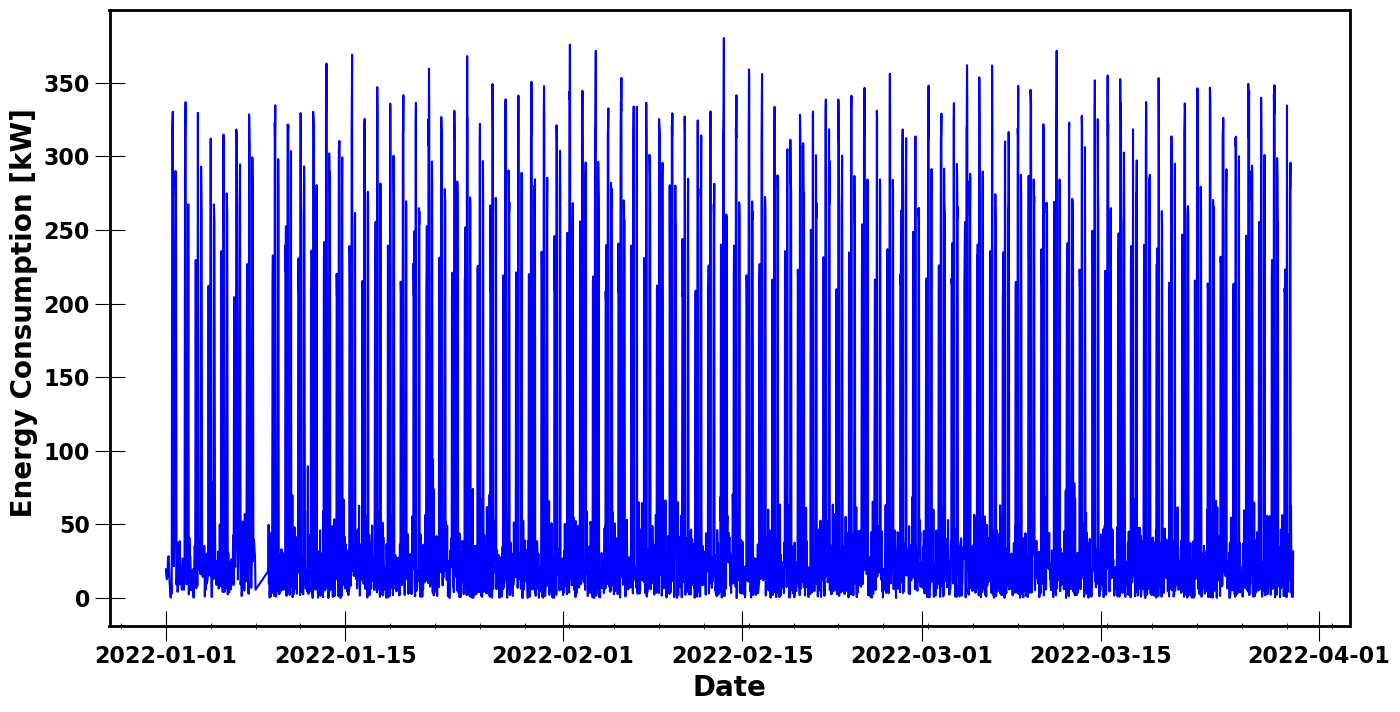

In [11]:
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.date,df.energy,'b')
ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Date',fontsize=20,fontweight='bold')
plt.show()

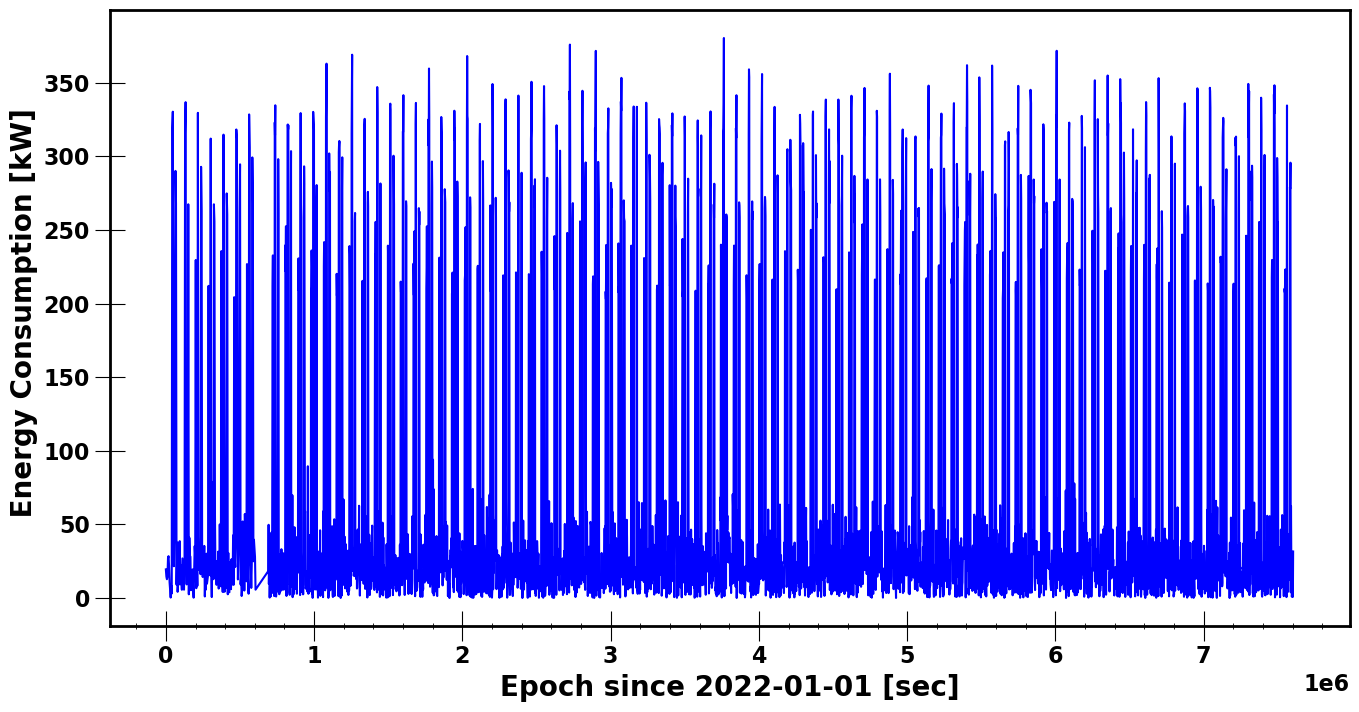

In [12]:
# Visualise the data
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.second,df.energy,'b')
ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Epoch since 2022-01-01 [sec]',fontsize=20,fontweight='bold')
plt.show()

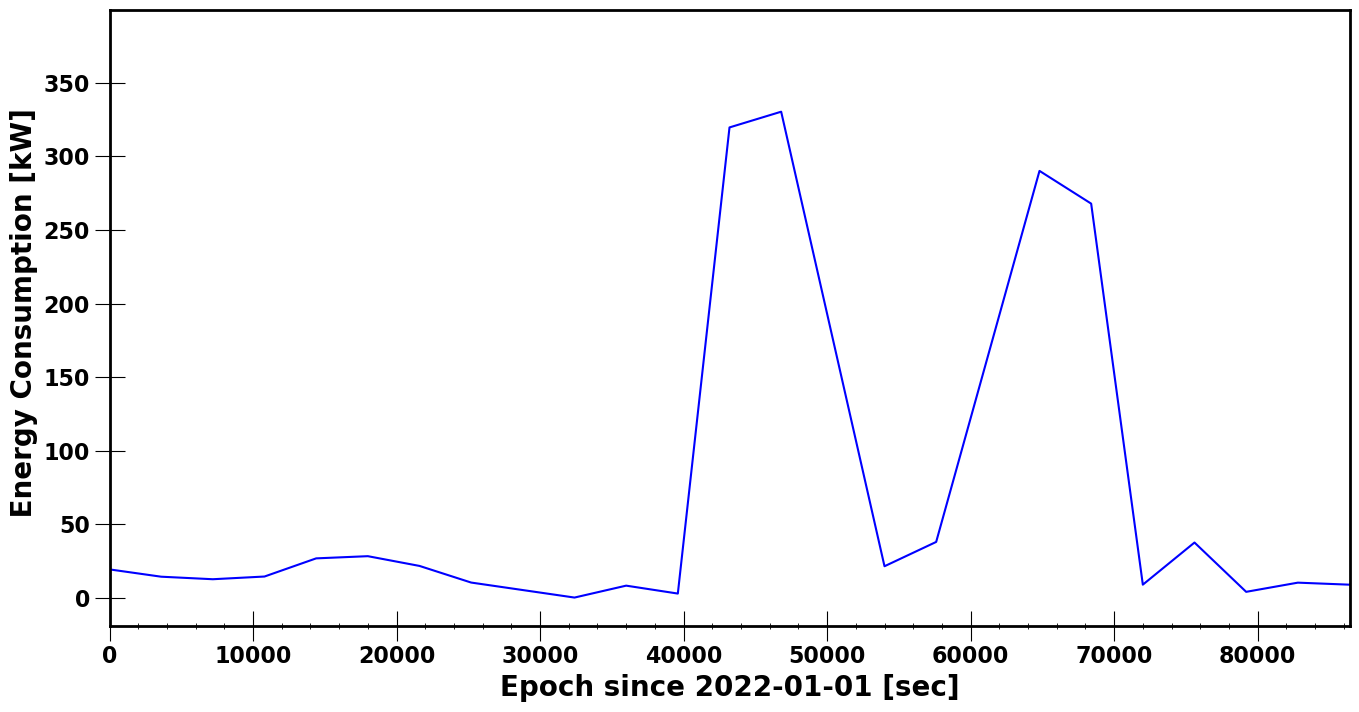

In [13]:
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.second,df.energy,'b')
ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Epoch since 2022-01-01 [sec]',fontsize=20,fontweight='bold')
ax1.set_xlim([0,1*3600*24])
plt.show()

/tmp/ipykernel_801115/2690328422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sn.boxplot(x='Month', y='energy', data=df, palette="Set3", linewidth=1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


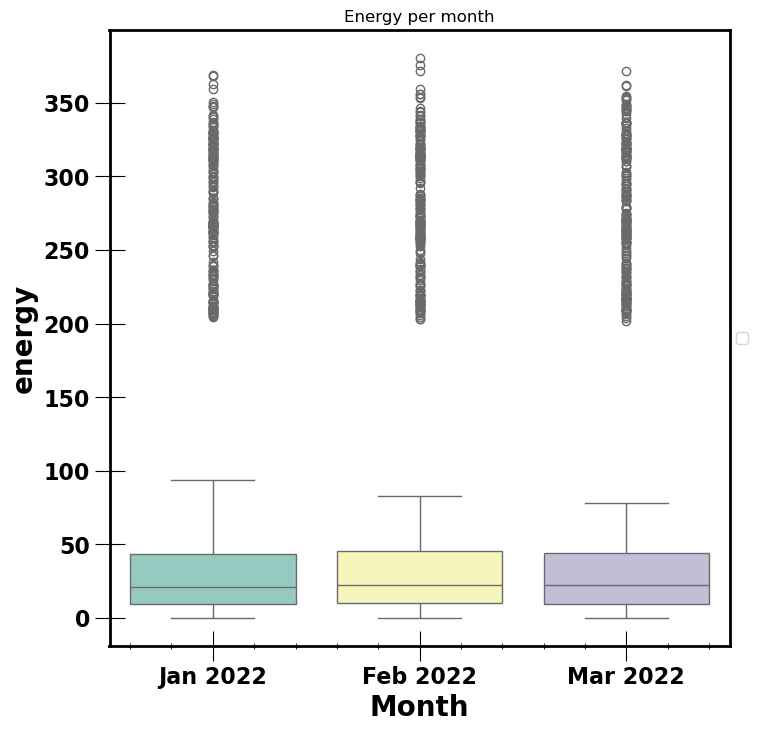

In [14]:
# We can look at the consumption per month
# For this I will add a columns month_year to my dataframe
df['Month'] = df['date'].apply(lambda x: x.strftime('%b %Y'))

fig, ax1 = plt.subplots(figsize=(8,8), facecolor='w', edgecolor='k')
ax1 = sn.boxplot(x='Month', y='energy', data=df, palette="Set3", linewidth=1)
ax1.set_title('Energy per month')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
#Let check the number
df[['energy','Month']].groupby('Month').agg('median')

,energy
Month,
Feb 2022,22.227970
Jan 2022,21.119041
Mar 2022,22.090834


### Stationarity

**ADF (Augmented Dickey-Fuller) Test**

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

***Null Hypothesis***: The series has a unit root (value of a =1)

***Alternate Hypothesis***: The series has no unit root.


    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

The following function is one that can plot a series with its rolling mean and standard deviation.

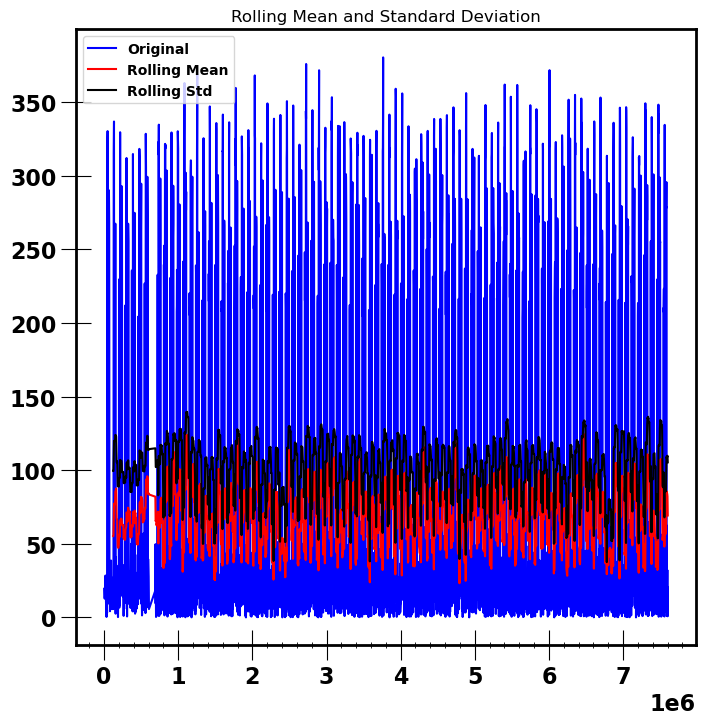

Results of dickey fuller test
Test Statistics                 -22.435255
p-value                           0.000000
No. of lags used                 30.000000
Number of observations used    3779.000000
critical value (1%)              -3.432082
critical value (5%)              -2.862305
critical value (10%)             -2.567177
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df,rollingwindows):
    #Determing rolling statistics
    energy=df['energy']
    rolmean = energy.rolling(rollingwindows).mean()
    rolstd = energy.rolling(rollingwindows).std()
    #Plot rolling statistics:
    fig, ax1 = plt.subplots(figsize=(8,8), facecolor='w', edgecolor='k')
    ax1.plot(df.second,df.energy, color='blue',label='Original')
    ax1.plot(df.second,rolmean, color='red', label='Rolling Mean')
    ax1.plot(df.second,rolstd, color='black', label = 'Rolling Std')
    ax1.legend(loc='best')
    ax1.set_title('Rolling Mean and Standard Deviation')
    plt.show(block=False)


    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(df['energy'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df,30)


Through the above graph, we can see the mean and standard deviation are pretty constant with time.
Looking at the ADF test, we see that the statistics is negative (-22). The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). If we look at the p-value, p-value <= 0.05 so we reject the null hypothesis (H0), the data does not have a unit root and is stationary.



**Add features**


In [17]:
def create_features(df):
    """
    Creates time series features from datetime index.
    """
    
    from pandas.api.types import CategoricalDtype

    cat_type = CategoricalDtype(categories=['Monday',
                                            'Tuesday',
                                            'Wednesday',
                                            'Thursday',
                                            'Friday',
                                            'Saturday',
                                            'Sunday'],
                                ordered=True)

    df = df.copy()
    df['Datetime'] = df.index
    df['hour'] = df['Datetime'].dt.hour
    df['min'] = df['Datetime'].dt.minute

    df['weekday'] = df['Datetime'].dt.day_name().astype(cat_type)
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofmonth'] = df['Datetime'].dt.day
    df['weekofyear'] = df.index.isocalendar().week
    df['date_offset'] = (df.Datetime.dt.month*100 + df.Datetime.dt.day - 320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter'])
    
    df = df.drop(columns='date_offset')
    df = df.set_index('Datetime')

    return df

In [18]:
df_features=df.set_index('date')
df_features=create_features(df_features)
df_features['hourmin']=df_features['hour']+df_features['min']/60
df_features

,energy,second,Month,hour,min,weekday,month,year,dayofmonth,weekofyear,season,hourmin
Datetime,,,,,,,,,,,,
2022-01-01 00:00:00,19.443080,0,Jan 2022,0,0,Saturday,1,2022,1,52,Winter,0.0
2022-01-01 01:00:00,14.478664,3600,Jan 2022,1,0,Saturday,1,2022,1,52,Winter,1.0
2022-01-01 02:00:00,12.761905,7200,Jan 2022,2,0,Saturday,1,2022,1,52,Winter,2.0
2022-01-01 03:00:00,14.595409,10800,Jan 2022,3,0,Saturday,1,2022,1,52,Winter,3.0
2022-01-01 04:00:00,26.931920,14400,Jan 2022,4,0,Saturday,1,2022,1,52,Winter,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 22:00:00,2.379316,7596000,Mar 2022,22,0,Tuesday,3,2022,29,13,Spring,22.0
2022-03-29 22:30:00,12.245813,7597800,Mar 2022,22,30,Tuesday,3,2022,29,13,Spring,22.5
2022-03-29 23:00:00,20.545312,7599600,Mar 2022,23,0,Tuesday,3,2022,29,13,Spring,23.0


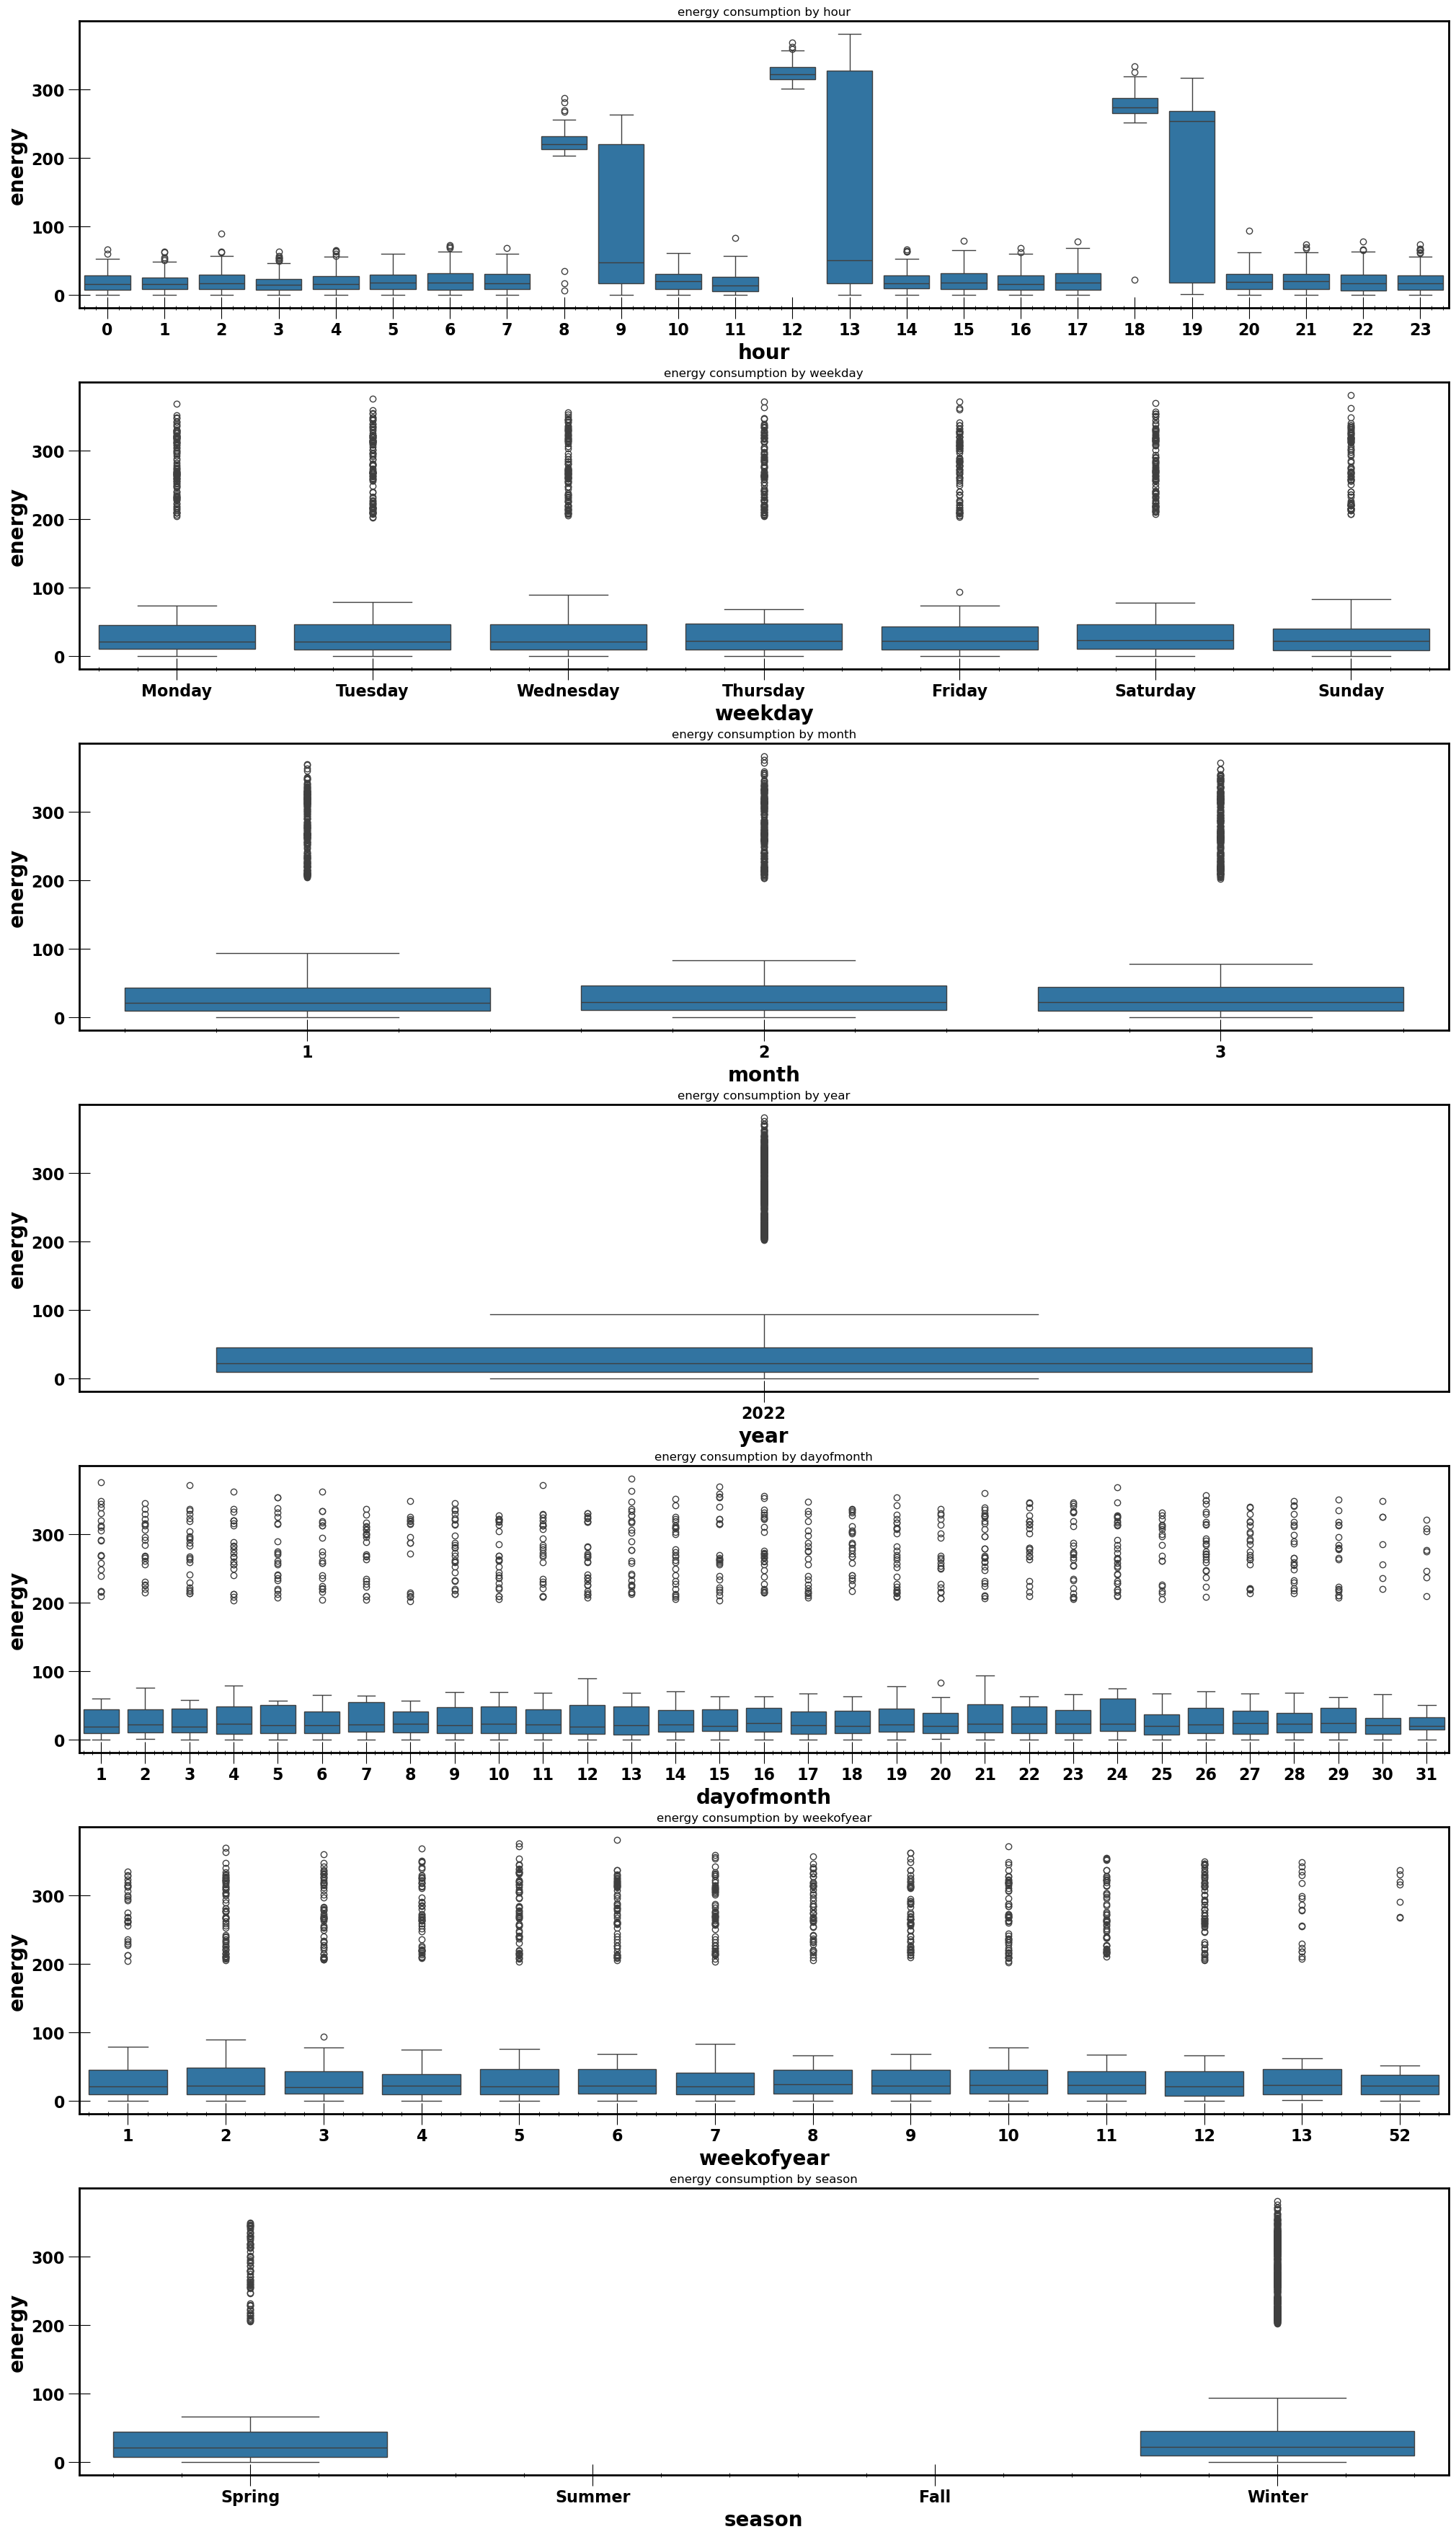

In [19]:
ts_curious = ['hour', 'weekday', 'month', 'year', 'dayofmonth', 'weekofyear', 'season']
ts_el = len(ts_curious)

fig, ax = plt.subplots(nrows=ts_el, ncols=1, figsize=(20, 5*ts_el))

for i, ts in enumerate(ts_curious):
    sn.boxplot(data=df_features, x=ts, y='energy', ax=ax[i])
    ax[i].set_title(f'energy consumption by {ts}')

    
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0.5)
plt.show()



# Time series analysis

## Spike definition 

A spike is defined using the Bayesian block algorithm (Scargle 1998; Scargle et al. 2013). 
First, the Bayesian block algorithm is used to segment the curve into blocks with statistically
constant energy. Then, we choose an energy threshold above which a block is designated as a spike.

This technique is useful as it can identify significant data series changes independently of gaps or exposure variations and does not need a prior for the spike timescale. 

After identify blocks:
i) We select all the local maxima with a peak higher than E~+σE
where E~ the median energy + σE where σE the standard deviation
Note that a block peak is defined as the average energy in the block.

ii) We regroup blocks using the HOP algorithm (Eisenstein &
Hut 1998) based on a bottom-up hill-climbing concept. We proceed downward from the peak, and every block subsequently lower
in both directions (left and right) belongs to that peak. The energy exceeding our quiescent level (E~+σE) determines the start/end of the spike


#### Find blocks

In [20]:
import astropy.stats.bayesian_blocks as bblocks
p0_val=0.05
# get Bayesian block edges 
ncp_prior_val=4-np.log(73.53*p0_val*np.size(df.energy)**-0.478)

edges = bblocks(t=df.second, x=df.energy, fitness='measures',ncp_prior=ncp_prior_val)
# get edge_index
edge_index = np.array([np.where(df.second >= edges[i])[0][0] for i,_ in enumerate(edges)])
#change last entry such that loop over [j:j+1] gives all blocks
edge_index[-1] += 1

# determine energy value (mean) and error for each block
block_val = np.zeros(len(edge_index)-1)  
block_val_error = np.zeros(len(edge_index)-1) 
for j in range(len(edge_index)-1):
	flux_blocks=df.energy[edge_index[j]:edge_index[j+1]]
	block_val[j] = np.mean(flux_blocks)
	block_val_error[j] = np.std(flux_blocks)

# create block-per-bin array corresponding to flux
block_pbin = np.zeros(len(df.energy))
for k,_ in enumerate(block_val):
	block_pbin[edge_index[k]:edge_index[k+1]]=block_val[k]


med_energy=np.median(df.energy)
std_energy=np.std(df.energy)
#Select baseline
baseline=med_energy+std_energy

#### Hop algorithms

In [21]:
def handle_hops(edges, peaks, starts, ends, max_flares, emax_flares, lc_edges):
	"""
	Handle mismatches and issues with peak_time, start_time, and end_time combinations
	lc_edges:
	    a) neglect:
		single start and end times are neglected
		peaks without start or end time are neglected
	    b) add:
		single start and end times are neglected
		peaks without start/end: start/end is added in beginning/end of light curve
	"""
	if len(peaks) < 1:
		print('not variable enough, no peak found')
		return(None, None, None, None, None)
	if lc_edges == 'neglect':
		if len(starts) < 1 or len(ends) < 1:
			print('not variable enough, missing start or end')
			return(None, None, None, None, None)
	if lc_edges == 'add':
		if len(starts) < 1:
			starts = np.insert(starts, 0, edges[0])
			print('inserted single start in beginning of LC')
		if len(ends) < 1:
			ends = np.append(ends,edges[-1])
			print('inserted single end in end of LC')
	if ends[0] < peaks[0]:
		ends = np.delete(ends, 0)
		print('deleted single end in beginning of LC')
		if len(ends) < 1 and lc_edges == 'neglect':
			print('this was the only end, not variable enough')
			return(None, None, None, None, None)
		if len(ends) < 1 and lc_edges == 'add':
			ends = np.append(ends, edges[-1])
			print('inserted single end in end of LC and this is the only end')    
	if starts[-1] > peaks[-1]:
		starts = np.delete(starts, -1)
		print('deleted single start in end of LC')
		if len(starts) < 1 and lc_edges == 'neglect':
			print('this was the only start, not variable enough')
			return(None, None, None, None, None)
		if len(starts) < 1 and lc_edges == 'add':
			starts = np.insert(starts, 0, edges[0])
			print('inserted single start in beginning of LC; this is the only start')
	if peaks[0] < starts[0]:
		if lc_edges == 'add':
			# artificially add start
			starts = np.insert(starts, 0, edges[0])
			print('inserted single start in beginning of LC')
		if lc_edges == 'neglect':
			# conservatively dismiss first peak if there are multiple peaks
			while ends[0] > peaks[1]:
				peaks = np.delete(peaks, 0)
				max_flares = np.delete(max_flares, 0)
				print('neglected first multiple peak in beginning of LC')
			#conservatively dismiss first peak and first end
			peaks = np.delete(peaks, 0)
			max_flares = np.delete(max_flares, 0)
			ends = np.delete(ends, 0)
			print('start missing, neglected peak and end in beginning of LC')
			if len(peaks) < 1 or len(ends) < 1:
				print('this was the only peak or end, not variable enough')
				return(None, None, None, None, None)
	if peaks[-1] > ends[-1]:
		if lc_edges == 'add':
			# artificially add end
			ends = np.append(ends, edges[-1])
			print('inserted single end in end of LC') 
		if lc_edges == 'neglect':
			# conservatively dismiss last peak if there are multiple peaks
			if len(peaks) > 2:
				while starts[-1] < peaks[-2]:
					peaks = np.delete(peaks, -1)
					max_flares = np.delete(max_flares, -1)
					print('neglected last multiple peak in end of LC')
				# conservatively dismiss last peak and last start
			peaks = np.delete(peaks, -1)
			max_flares = np.delete(max_flares, -1)
			starts = np.delete(starts, -1)
			print('neglected peak and start in end of LC')
			if len(peaks) < 1 or len(starts) < 1:
				print('this was the only peak or start, not variable enough')
				return(None, None, None, None, None)

	return(peaks, starts, ends, max_flares,emax_flares)
def get_hop_baseline(edges,flux,block_val,block_val_error,baseline=None, lc_edges='neglect'):
	"""
	BASELINE METHOD
	see Meyer et al. 2019 https://ui.adsabs.harvard.edu/abs/2019ApJ...877...39M/abstract
	Define flare as group of blocks (HOP group) with start, peak, and end time
	Determine peak_time of flare to be at center of colal maxima of the blocks
	Determine start_time/end_time to be where flux exceeds/goes under baseline
	baseline: 
	    e.g. mean of flux (default), median of flux, quiescent background ...
	lc_edges:
	    a) 'neglect'
		single start and end times are neglected
		incomplete flares (peaks without start or end time) are conservatively neglected
	    b) 'add'
		single start and end times are neglected
		if peak has no start/end it is artificially added in beginning/end of light curve
	returns:
	    HOP groups, e.g. [[start, peak, end],[start, peak, end]]
	    (Note: all starts can be called with lc.start_times_bl, for example)
	"""
	if baseline is None:
		baseline = np.median(flux)
		print('use default baseline: median(flux)')
	else:
		baseline = baseline

	diff = np.diff(block_val)
	peak_times = [] #time of all local peaks over baseline (in units of edges = units of time)
	max_flares = [] #max block value
	emax_flares = [] #max block value
	for i in range(1,len(diff)):
		# if previous rising; this falling
		if diff[i-1] > 0 and diff[i] < 0:
			if block_val[i] > baseline:
				# peak_time = middle of peak block
				peak_times.append(edges[i] + (edges[i+1] - edges[i]) /2)
				max_flares.append(block_val[i])
				emax_flares.append(block_val_error[i])
	start_times = []  
	end_times = []    
	for i in range(len(block_val)-1):
		# if this smaller; next one higher
		if block_val[i] < baseline and block_val[i+1] > baseline:
			start_times.append(edges[i+1])
		# if this larger; next one lower
		if block_val[i] > baseline and block_val[i+1] < baseline:
			end_times.append(edges[i+1])
	peak_times, start_times, end_times, max_flares,emax_flares = handle_hops(edges,np.array(peak_times), np.array(start_times), np.array(end_times), np.array(max_flares), np.array(emax_flares), lc_edges) 
	if peak_times is None:
		start_times_bl, end_times_bl,max_flare_bl,emax_flare_bl = None, None, None, None
		print('light curve is not variable enough; no hop found.')
		return(None)
	# baseline method could result in multiple peaks within one HOP 
	# -> neglect smaller peak (not so senseful..)
	while len(end_times) < len(peak_times):
		for x,_ in enumerate(end_times):
			if end_times[x] > peak_times[x+1]:
				if (block_val[bb_i(edges,peak_times[x])]< block_val[bb_i(edges,peak_times[x+1])]):
					peak_times = np.delete(peak_times, x)
					max_flares = np.delete(max_flares, x)
					emax_flares = np.delete(emax_flares, x)
				elif (block_val[bb_i(edges,peak_times[x])] >= block_val[bb_i(edges,peak_times[x+1])]):
					peak_times = np.delete(peak_times, x+1)
					max_flares = np.delete(max_flares, x+1)
					emax_flares = np.delete(emax_flares, x+1)
				break
	peak_times_bl = peak_times
	start_times_bl = start_times
	end_times_bl = end_times
	max_flare_bl=max_flares
	emax_flare_bl=emax_flares
	return(np.array([start_times, peak_times, end_times,max_flare_bl,emax_flare_bl]).transpose())
def bb_i(edges,t):
	"""
	Convert time to index of corresponding Bayesian block (e.g. block_value of peak_time)
	"""
	if t == edges[0]:
		return(int(0))
	else:
		block_index = [e for e in range(len(edges)-1) if t > edges[e] and t <= edges[e+1]]
	return(int(block_index[0]))

def bb_i_start(edges,t):
	"""
	Convert time to index of corresponding Bayesian block assuming that time is start time
	(i.e. if time = edge -> take block on the left)
	"""
	block_index = [e for e in range(len(edges)-1) if t >= edges[e] and t < edges[e+1]]
	return(int(block_index[0]))

def bb_i_end(edges,t):
	"""
	Convert time to index of corresponding Bayesian block assuming that time is end time
	(i.e. if time = edge -> take block on the right)
	"""
	block_index = [e for e in range(len(edges)-1) if t > edges[e] and t <= edges[e+1]]
	return(int(block_index[0]))

hops_blocks = get_hop_baseline(edges,df.energy,block_val,block_val_error,baseline=baseline, lc_edges='neglect')
start_peak,peak_times,end_peak,max_peak,emax_peak=hops_blocks.T

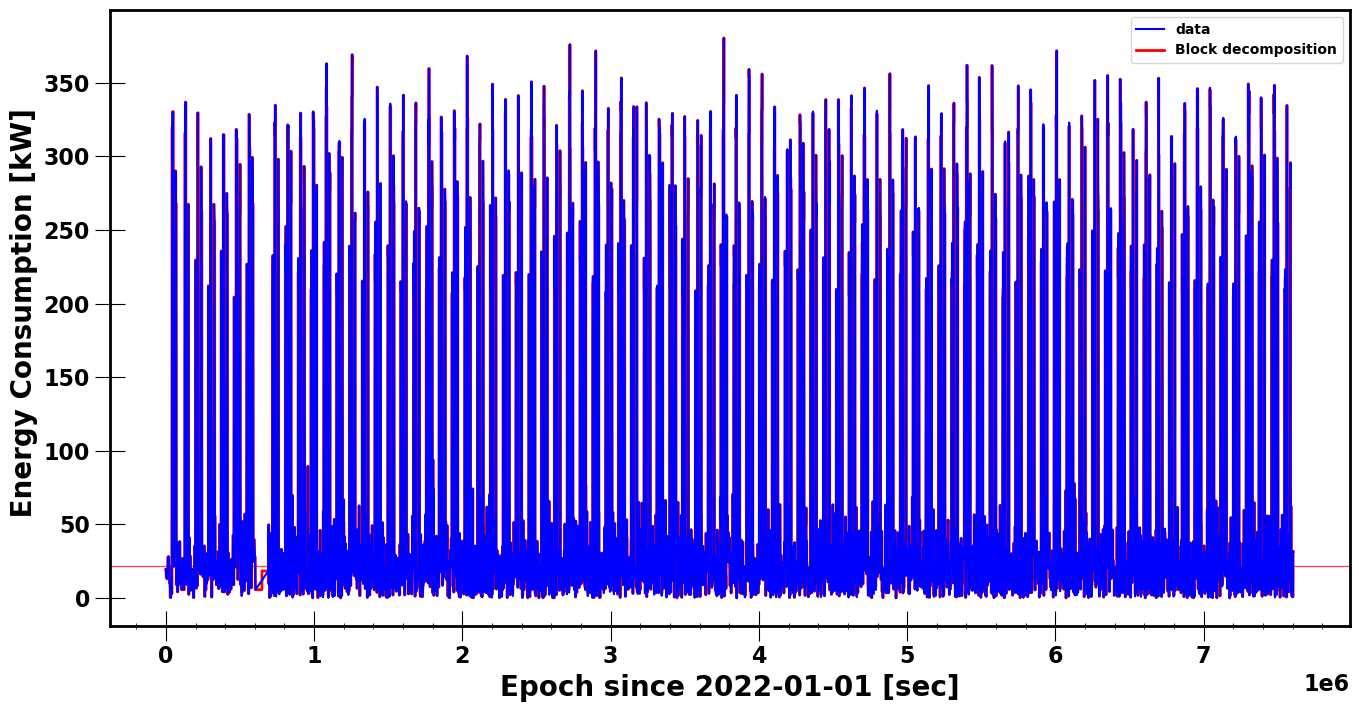

In [22]:
# Visualise the data and the spike selection
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.second,df.energy,'b',label='data')
ax1.step(df.second, block_pbin, where='mid', linewidth=2, color='r', zorder=0,label='Block decomposition')

ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Epoch since 2022-01-01 [sec]',fontsize=20,fontweight='bold')
ax1.axhline(med_energy,color='red',alpha=0.7, linewidth=1, zorder=0)
ax1.legend()
plt.show()

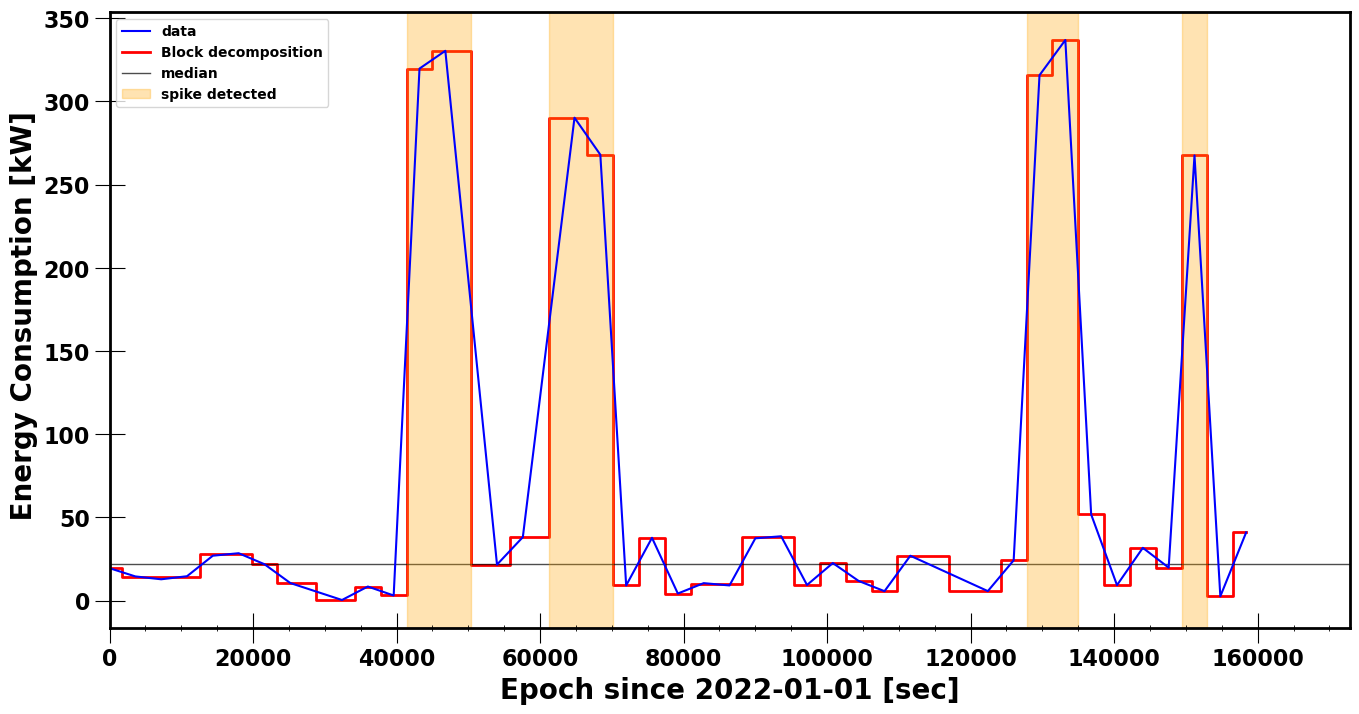

In [23]:
# Zoom first 4 peaks
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.second[0:40],df.energy[0:40],'b',label='data')
ax1.step(df.second[0:40], block_pbin[0:40], where='mid', linewidth=2, color='r', zorder=0,label='Block decomposition')

ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Epoch since 2022-01-01 [sec]',fontsize=20,fontweight='bold')
ax1.axhline(med_energy,color='k',alpha=0.7, linewidth=1, zorder=0,label='median')
#peak selected
ax1.axvspan(start_peak[0],end_peak[0],color='orange', label='spike detected',alpha=0.3, linewidth=1, zorder=0)
for i in range(3):
	ax1.axvspan(start_peak[i+1],end_peak[i+1],color='orange',alpha=0.3, linewidth=1, zorder=0)

ax1.legend()
ax1.set_xlim([0,2*3600*24])
plt.show()

#### Code performance

I am not sure about my program performance in term of big-O notation.

What I will do, I will calculate the time to obtain a dataframe with all the spikes, start, end, max for
different dataframe size.
Then I will create a fake dataset and rerun my program. Each time my simulated df will be X times the size of
the original. I will use the same energy consumption for the new data created.

In [24]:
def dataframe_spike(df,p0_val,baseline):

	# get Bayesian block edges 
	ncp_prior_val=4-np.log(73.53*p0_val*np.size(df.energy)**-0.478)

	edges = bblocks(t=df.second, x=df.energy, fitness='measures',ncp_prior=ncp_prior_val)
	# get edge_index
	edge_index = np.array([np.where(df.second >= edges[i])[0][0] for i,_ in enumerate(edges)])
	#change last entry such that loop over [j:j+1] gives all blocks
	edge_index[-1] += 1

	# determine energy value (mean) and error for each block
	block_val = np.zeros(len(edge_index)-1)  
	block_val_error = np.zeros(len(edge_index)-1) 
	for j in range(len(edge_index)-1):
		flux_blocks=df.energy[edge_index[j]:edge_index[j+1]]
		block_val[j] = np.mean(flux_blocks)
		block_val_error[j] = np.std(flux_blocks)

	# create block-per-bin array corresponding to flux
	block_pbin = np.zeros(len(df.energy))
	for k,_ in enumerate(block_val):
		block_pbin[edge_index[k]:edge_index[k+1]]=block_val[k]

	med_energy=np.median(df.energy)
	std_energy=np.std(df.energy)
	#Select baseline
	if baseline is None:
		baseline=med_energy+std_energy
	else:
		baseline = baseline


	#HOP algorithm
	hops_blocks = get_hop_baseline(edges,df.energy,block_val,block_val_error,baseline=baseline, lc_edges='neglect')
	start_peak,peak_times,end_peak,max_peak,emax_peak=hops_blocks.T


	# initialize data of lists.
	data = {'spike': np.arange(0,np.size(start_peak),1),'start': start_peak,'end': end_peak,'peak': peak_times,'max': max_peak,'emax': emax_peak}
 	
	# Create DataFrame
	df_spike = pd.DataFrame(data)


	return df_spike


df_spike=dataframe_spike(df,p0_val=0.05,baseline=None)


100%|█████████████████████████████████████████████| 8/8 [02:00<00:00, 15.12s/it]


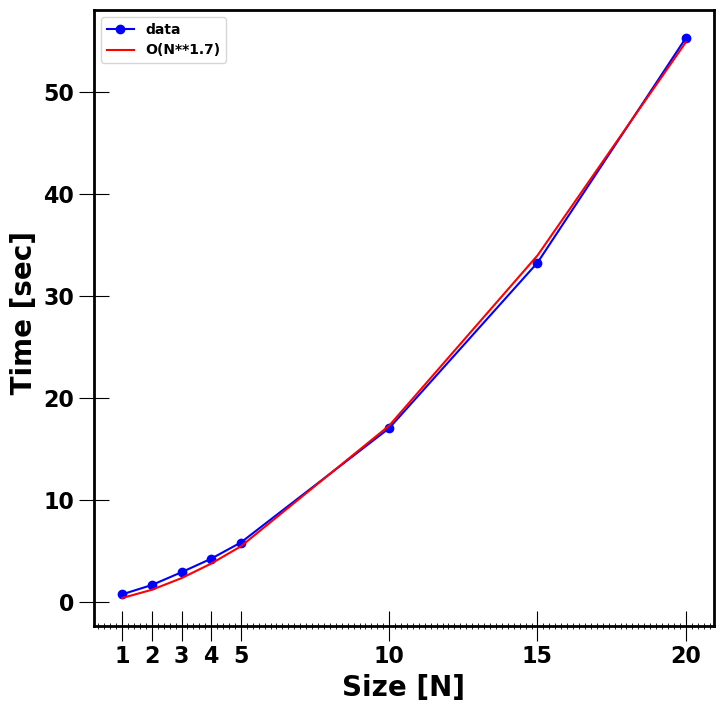

In [25]:
N=np.array([1,2,3,4,5,10,15,20])
t_sim=[]
from tqdm import tqdm
import time
for i in tqdm(N):
	data = {'second': np.arange(0,1800*i*df.shape[0],1800),'energy': np.tile(df['energy'].values, i)}
	df_sim=pd.DataFrame(data)
	start_time = time.time()
	df_spike_sim=dataframe_spike(df_sim,p0_val=0.05,baseline=None)
	end_time = time.time()
	t_sim.append(end_time - start_time)
	
#let calculate the exponent
from scipy.optimize import curve_fit
def power_law(x, a, b):
	return a * np.power(x, b)	


popt, pcov = curve_fit(power_law, N, t_sim)
a,b=popt


# Time program versus size
fig, ax1 = plt.subplots(figsize=(8,8), facecolor='w', edgecolor='k')
ax1.plot(N,t_sim,'bo',linestyle='-',label='data')

plt.plot(N, power_law(N, *popt), 'r-', label='O(N**%0.1f)'%b)

ax1.set_ylabel(' Time [sec]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Size [N]',fontsize=20,fontweight='bold')
ax1.set_xticks([1,2,3,4,5,10,15,20])
plt.legend()
plt.show()	

**Conclusions**

In terms of performance, my program to detect spikes and create a dataframe with start,end,peak,max,emax of each spike
in O-big notation is O(N**1.8).
This means the runtime increases by 1.8 with the size of data.


## Spike analysis 


In [26]:
spike_0=df_spike[df_spike['max']<260]
spike_1=df_spike[(df_spike['max']>260) & (df_spike['max']<300)]
spike_2=df_spike[df_spike['max']>300]


spike_0.loc[:,'Family'] = 'Family 0'
spike_1.loc[':,Family'] = 'Family 1'
spike_2.loc[:,'Family'] = 'Family 2'


df_concat = pd.concat([spike_0, spike_1, spike_2], ignore_index=True)
print(df_concat)
#plt.figure(figsize=(8, 6))
#sn.boxplot(x='Family', y='max', data=df_concat)
#plt.title('Boxplot the 3 different spikes')
#plt.xlabel('Family')
#plt.ylabel('Max Value')
#plt.show()



    spike      start        end       peak         max emax    Family
0       4   199800.0   203400.0   201600.0   229.62663  0.0  Family 0
1       7   286200.0   289800.0   288000.0  212.064298  0.0  Family 0
2      10   372600.0   376200.0   374400.0  235.693587  0.0  Family 0
3      13   459000.0   462600.0   460800.0  204.370063  0.0  Family 0
4      16   545400.0   549000.0   547200.0   226.84808  0.0  Family 0
..    ...        ...        ...        ...         ...  ...       ...
255   248  7299900.0  7307100.0  7300800.0  349.251863  0.0  Family 2
256   251  7386300.0  7389900.0  7387200.0  339.880068  0.0  Family 2
257   252  7407900.0  7411500.0  7410600.0  300.989462  0.0  Family 2
258   254  7472700.0  7479900.0  7477200.0  348.321645  0.0  Family 2
259   257  7560000.0  7562700.0  7561350.0  334.597381  0.0  Family 2

[260 rows x 7 columns]


/tmp/ipykernel_793259/3154551903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike_0.loc[:,'Family'] = 'Family 0'
/tmp/ipykernel_793259/3154551903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spike_1.loc[':,Family'] = 'Family 1'
/tmp/ipykernel_793259/3154551903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

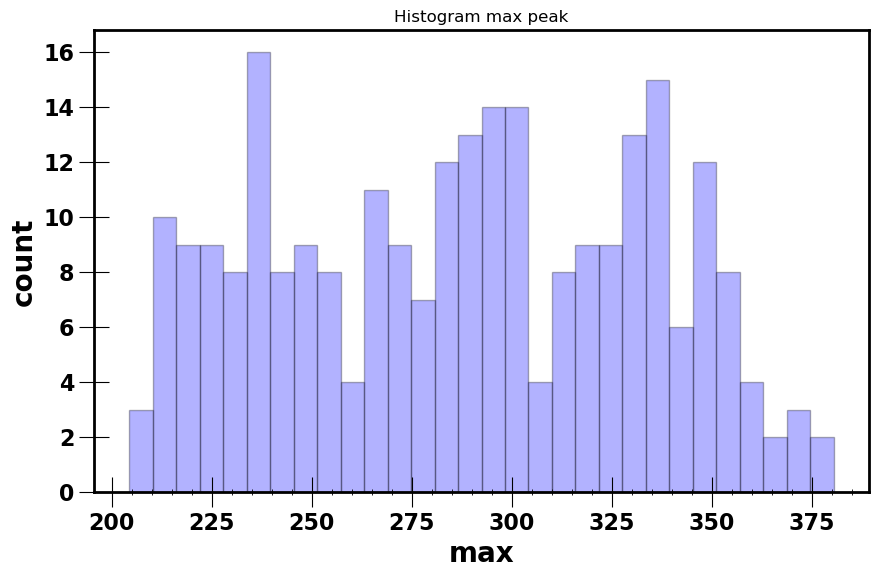

In [27]:
# Visualisation in histogram
fig, ax1 = plt.subplots(figsize=(10,6), facecolor='w', edgecolor='k')
ax1.hist(df_spike['max'],color='blue',bins=30,alpha=0.3,edgecolor='black')
ax1.set_xlabel('max')
ax1.set_ylabel('count')
ax1.set_title('Histogram max peak')
plt.show()

We think that there are 3 family of peak. We will apply clustering algorithms to define those 3 groups.

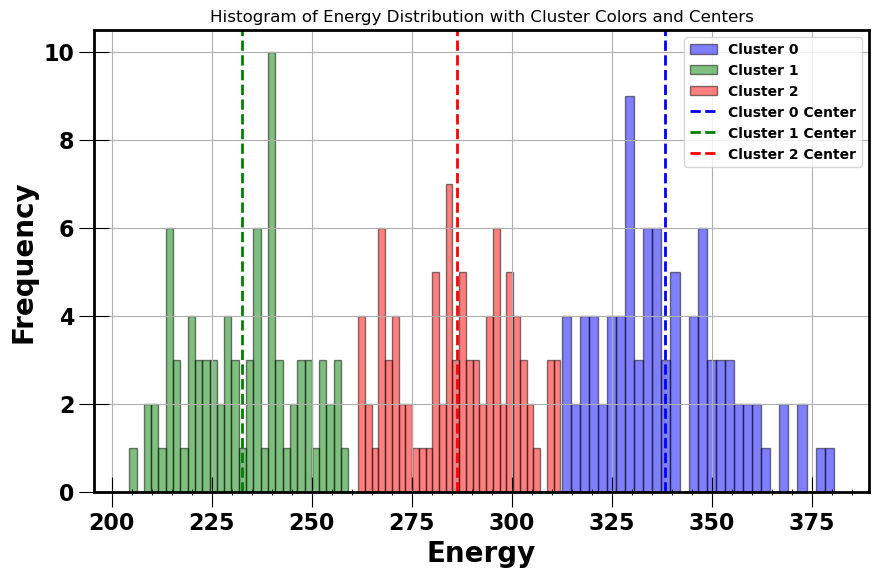

In [28]:
from sklearn.cluster import KMeans
X=df_spike.iloc[:,4:5]
kmeans = KMeans(n_clusters=3) # input the number of clusters
kmeans.fit(X)
#Get cluster labels and centers
cluster_labels = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

# Plotting the histogram with different colors for each cluster
plt.figure(figsize=(10, 6))

# Cluster 0
plt.hist(X[cluster_labels == 0], bins=30, alpha=0.5, color='blue', edgecolor='black', label='Cluster 0')

# Cluster 1
plt.hist(X[cluster_labels == 1], bins=30, alpha=0.5, color='green', edgecolor='black', label='Cluster 1')

# Cluster 2
plt.hist(X[cluster_labels == 2], bins=30, alpha=0.5, color='red', edgecolor='black', label='Cluster 2')

# Plot cluster centers
plt.axvline(cluster_centers[0], color='blue', linestyle='dashed', linewidth=2, label='Cluster 0 Center')
plt.axvline(cluster_centers[1], color='green', linestyle='dashed', linewidth=2, label='Cluster 1 Center')
plt.axvline(cluster_centers[2], color='red', linestyle='dashed', linewidth=2, label='Cluster 2 Center')

# Adding labels and title
plt.title('Histogram of Energy Distribution with Cluster Colors and Centers')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Check performance of clustering**

**Silhouette** is a technique in clustering to measure the similarity of data within the cluster compared to the other cluster. The Silhouette coefficient is a numerical representation ranging from -1 to 1. Value 1 means each cluster completely differed from the others, and value  -1 means all the data was assigned to the wrong cluster

In [29]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.623960642285117


**Davies-Bouldin Index** is a clustering evaluation metric measured by calculating the average similarity between each cluster and its most similar one. The ratio of within-cluster distances to between-cluster distances calculates the similarity. This means the further apart the clusters and the less dispersed would lead to better scores.
The Davies-Bouldin Index aims to have a lower score as much as possible. The lower the score was, the more separated each cluster was.

In [30]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.4601003585383892


a Davies-Bouldin Index of 0.46 is a promising result and suggests that our clustering algorithm has produced well-defined clusters with reasonably good separation between them

**Elbow curve**: We plot the elbow curve to check how many clusters we should use.

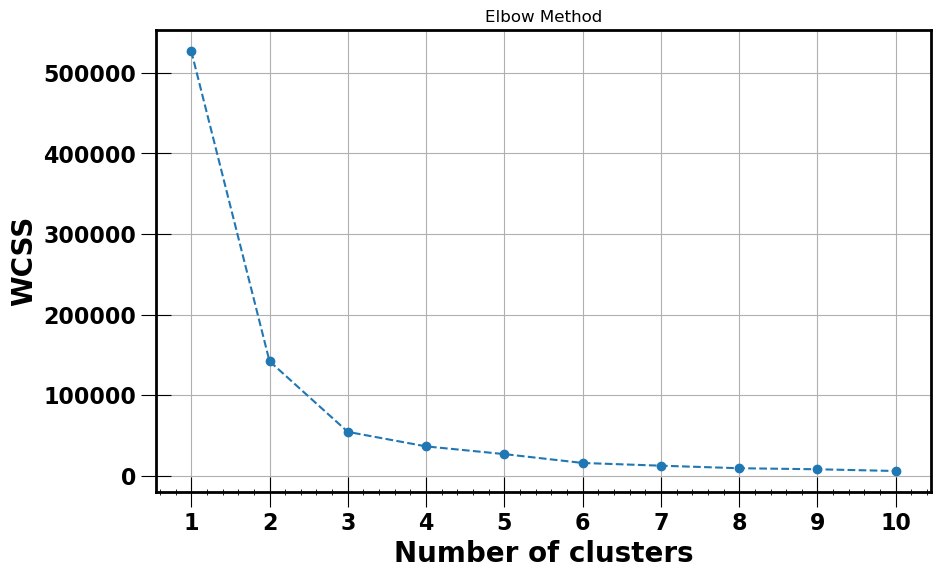

In [31]:
wcss = []
for i in range(1, 11):  # Assume we want to check for k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS value for an instance of KMeans


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid()
plt.show()

This figure confirms that k=3 appears to be the optimal number of clusters. This is because k=3 is where the plot suggests a change in the rate of decrease of WCSS, forming a noticeable "elbow".

In [32]:
#Add family for each spike

df_spike[cluster_labels==0]

df_spike.loc[cluster_labels==0, 'family'] = int(2.0)
df_spike.loc[cluster_labels==1, 'family'] = int(1.0)
df_spike.loc[cluster_labels==2, 'family'] = int(0.0)

df_spike['family'] = df_spike['family'].astype(int)

df_spike


,spike,start,end,peak,max,emax,family
0,0,41400.0,50400.0,47700.0,330.372017,0.0,2
1,1,61200.0,70200.0,63900.0,290.167204,0.0,0
2,2,127800.0,135000.0,133200.0,336.870183,0.0,2
3,3,149400.0,153000.0,151200.0,267.483011,0.0,0
4,4,199800.0,203400.0,201600.0,229.626630,0.0,1
...,...,...,...,...,...,...,...
254,254,7472700.0,7479900.0,7477200.0,348.321645,0.0,2
255,255,7494300.0,7501500.0,7495200.0,298.906930,0.0,0
256,256,7544700.0,7551900.0,7551000.0,223.239734,0.0,1
257,257,7560000.0,7562700.0,7561350.0,334.597381,0.0,2


#### Look at spike family properties

In [33]:
print('family 0: mean: %0.2f with std: %0.2f'%(df_spike[df_spike.family==0]['max'].mean(),df_spike[df_spike.family==0]['max'].std()))
print('family 1: mean: %0.2f with std: %0.2f'%(df_spike[df_spike.family==1]['max'].mean(),df_spike[df_spike.family==1]['max'].std()))
print('family 2: mean: %0.2f with std: %0.2f'%(df_spike[df_spike.family==2]['max'].mean(),df_spike[df_spike.family==2]['max'].std()))

family 0: mean: 286.53 with std: 13.86
family 1: mean: 232.67 with std: 13.83
family 2: mean: 338.52 with std: 15.92


In [34]:
df_spike['date_peak']=pd.to_datetime(df_spike['peak']+min(df.date.astype('int64')//10**9), unit='s')
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday',
                                        'Tuesday',
                                        'Wednesday',
                                        'Thursday',
                                        'Friday',
                                        'Saturday',
                                        'Sunday'],
                            ordered=True)

df_spike['Datetime'] = df_spike.date_peak
df_spike['hour'] = df_spike['Datetime'].dt.hour
df_spike['min'] = df_spike['Datetime'].dt.minute

df_spike['weekday'] = df_spike['Datetime'].dt.day_name().astype(cat_type)
df_spike['month'] = df_spike['Datetime'].dt.month
df_spike['year'] = df_spike['Datetime'].dt.year
df_spike['dayofmonth'] = df_spike['Datetime'].dt.day
df_spike = df_spike.drop(columns='Datetime')
df_spike['hourmin']=df_spike['hour']+df_spike['min']/60
df_spike

,spike,start,end,peak,max,emax,family,date_peak,hour,min,weekday,month,year,dayofmonth,hourmin
0,0,41400.0,50400.0,47700.0,330.372017,0.0,2,2022-01-01 13:15:00,13,15,Saturday,1,2022,1,13.250000
1,1,61200.0,70200.0,63900.0,290.167204,0.0,0,2022-01-01 17:45:00,17,45,Saturday,1,2022,1,17.750000
2,2,127800.0,135000.0,133200.0,336.870183,0.0,2,2022-01-02 13:00:00,13,0,Sunday,1,2022,2,13.000000
3,3,149400.0,153000.0,151200.0,267.483011,0.0,0,2022-01-02 18:00:00,18,0,Sunday,1,2022,2,18.000000
4,4,199800.0,203400.0,201600.0,229.626630,0.0,1,2022-01-03 08:00:00,8,0,Monday,1,2022,3,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,7472700.0,7479900.0,7477200.0,348.321645,0.0,2,2022-03-28 13:00:00,13,0,Monday,3,2022,28,13.000000
255,255,7494300.0,7501500.0,7495200.0,298.906930,0.0,0,2022-03-28 18:00:00,18,0,Monday,3,2022,28,18.000000
256,256,7544700.0,7551900.0,7551000.0,223.239734,0.0,1,2022-03-29 09:30:00,9,30,Tuesday,3,2022,29,9.500000
257,257,7560000.0,7562700.0,7561350.0,334.597381,0.0,2,2022-03-29 12:22:30,12,22,Tuesday,3,2022,29,12.366667


**Correlation between spike and hour of the days**

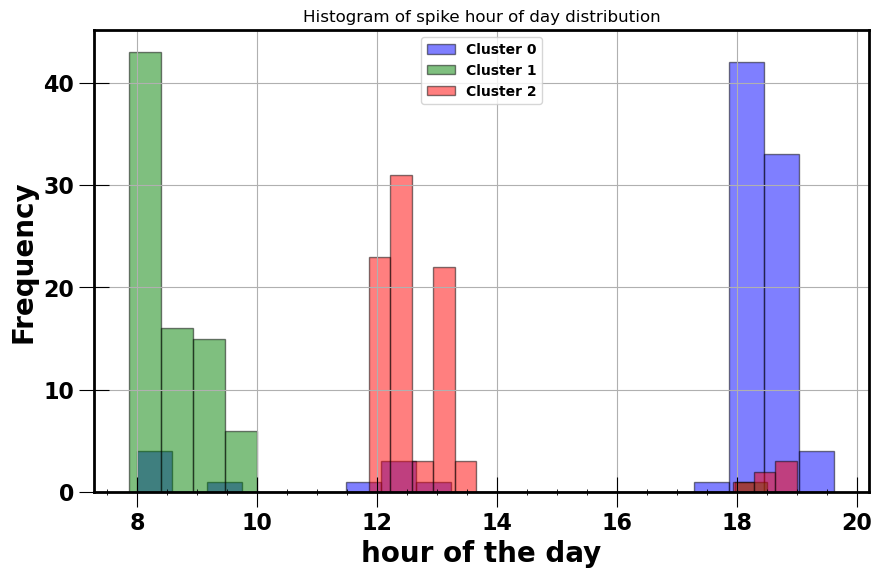

In [35]:
# Plotting the histogram with different colors for each cluster
plt.figure(figsize=(10, 6))

# Cluster 0
plt.hist(df_spike[df_spike['family']==0].hourmin, bins=20, alpha=0.5, color='blue', edgecolor='black', label='Cluster 0')

# Cluster 1
plt.hist(df_spike[df_spike['family']==1].hourmin, bins=20, alpha=0.5, color='green', edgecolor='black', label='Cluster 1')

# Cluster 2
plt.hist(df_spike[df_spike['family']==2].hourmin, bins=20, alpha=0.5, color='red', edgecolor='black', label='Cluster 2')

# Adding labels and title
plt.title('Histogram of spike hour of day distribution')
plt.xlabel('hour of the day')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Classification using max and time of the day**

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) # input the number of clusters
X=df_spike[['max','hourmin']]
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centroids = kmeans.cluster_centers_ #centroids of each clusters

centroids

array([[338.21863144,  12.92846442],
       [232.33535083,   8.44145833],
       [285.93960156,  17.56425926]])

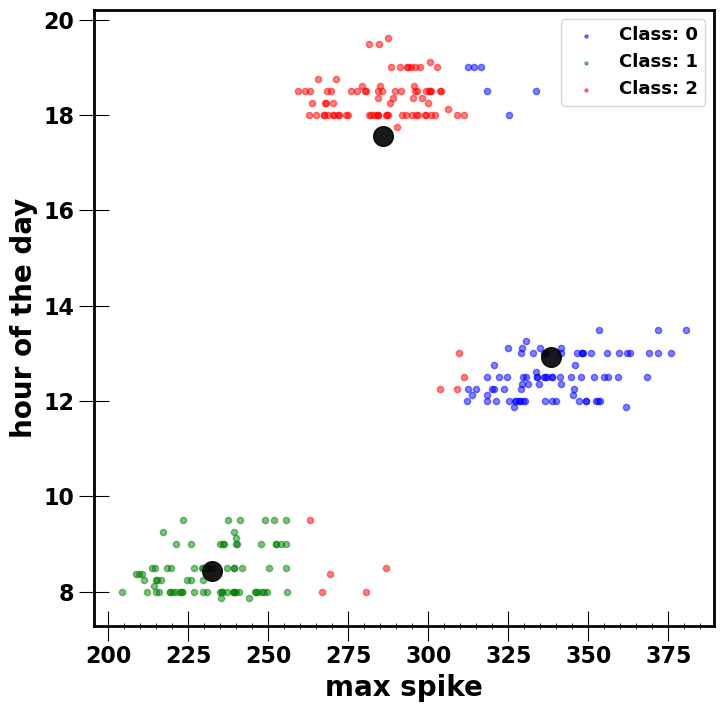

In [37]:
colors=['b','g','r']
fig,ax1 = plt.subplots(figsize=(8,8), facecolor='w', edgecolor='k')
class_ykmeans=np.unique(y_kmeans)
for i in class_ykmeans:
    ax1.scatter(X[y_kmeans==i]['max'],X[y_kmeans==i]['hourmin'],s=20,alpha=0.5,color=colors[i],label='Class: %s'%class_ykmeans[i])   

ax1.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.9);
ax1.set_xlabel('max spike')
ax1.set_ylabel('hour of the day')
ax1.legend(loc='best',markerscale=0.5,prop={'size':13},ncol=1)

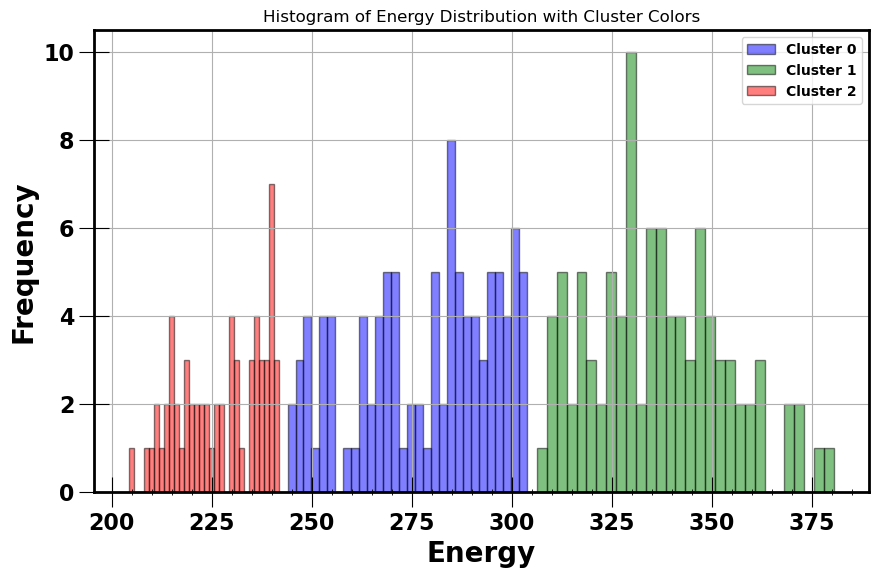

In [38]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

X=df_spike.iloc[:,4:5]
# Perform hierarchical/agglomerative clustering
model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(X)
# Create the linkage matrix for the dendrogram
Z = linkage(X, method='ward')

# Extracting data points for each cluster
cluster_0 = X[cluster_labels == 0]
cluster_1 = X[cluster_labels == 1]
cluster_2 = X[cluster_labels == 2]

# Plotting the histogram with different colors for each cluster
plt.figure(figsize=(10, 6))

# Cluster 0
plt.hist(cluster_0, bins=30, alpha=0.5, color='blue', edgecolor='black', label='Cluster 0')

# Cluster 1
plt.hist(cluster_1, bins=30, alpha=0.5, color='green', edgecolor='black', label='Cluster 1')

# Cluster 2
plt.hist(cluster_2, bins=30, alpha=0.5, color='red', edgecolor='black', label='Cluster 2')

# Adding labels and title
plt.title('Histogram of Energy Distribution with Cluster Colors')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Does the spikes correlate with another observable like the temperature?

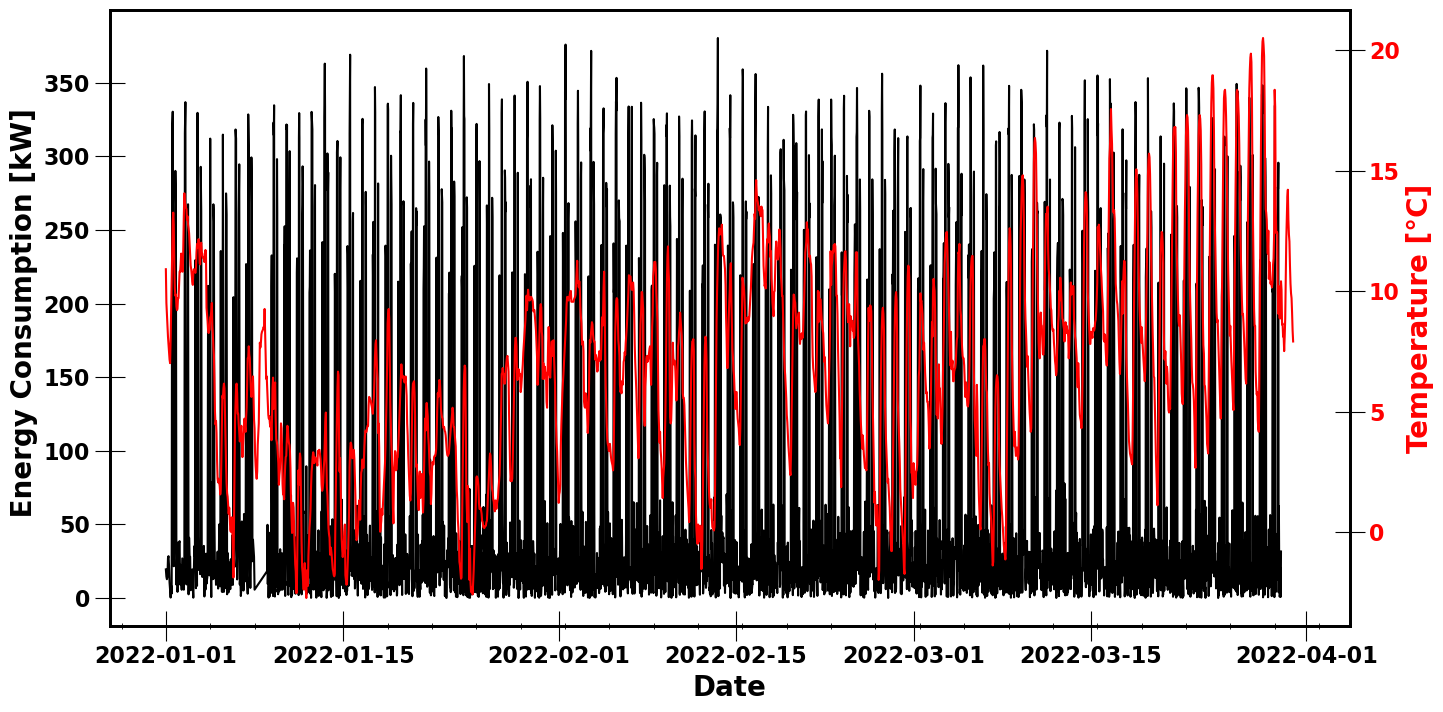

In [39]:
import openmeteo_requests
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 48.8566,
	"longitude": 2.3522,
	"start_date": "2022-01-01",
	"end_date": "2022-03-30",
	"hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)     

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temp"] = hourly_temperature_2m

df_temp = pd.DataFrame(data = hourly_data)


# Visualise the data
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.date,df.energy,'k')
ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Date',fontsize=20,fontweight='bold')

# axis for the temperature
ax2 = ax1.twinx()
ax2.plot(df_temp.date, df_temp.temp, 'r-', label='Temperature')
ax2.set_ylabel('Temperature [°C]', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.show()

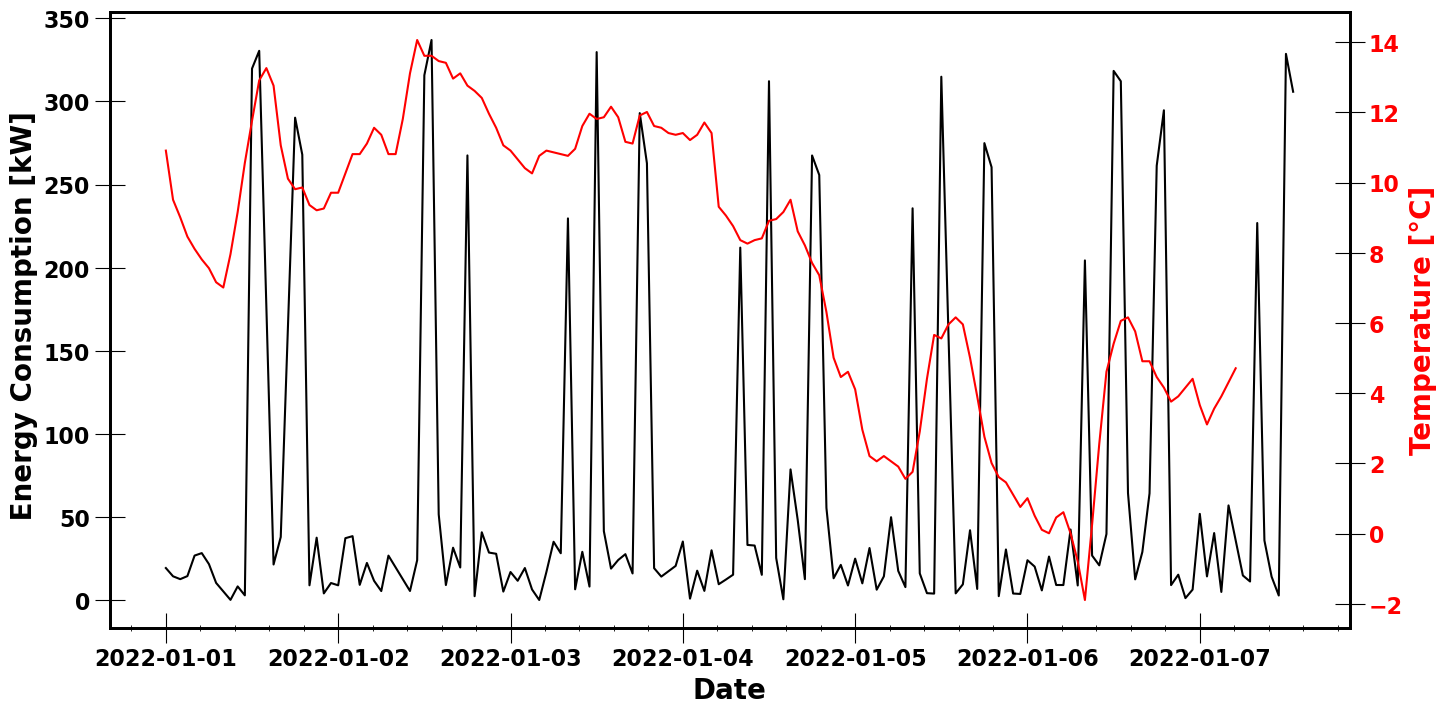

In [40]:
# zoom
fig, ax1 = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')
ax1.plot(df.date[0:150],df.energy[0:150],'k')
ax1.set_ylabel(' Energy Consumption [kW]',fontsize=20,fontweight='bold')
ax1.set_xlabel('Date',fontsize=20,fontweight='bold')

# axis for the temperature
ax2 = ax1.twinx()
ax2.plot(df_temp.date[0:150], df_temp.temp[0:150], 'r-', label='Temperature')
ax2.set_ylabel('Temperature [°C]', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.show()

# Prediction

In [41]:
# We create an empty dataframe where we will put the result for different model
columns = ['name', 'mae', 'mse', 'rmse', 'r2']
df_result = pd.DataFrame(columns=columns)
df_result

,name,mae,mse,rmse,r2


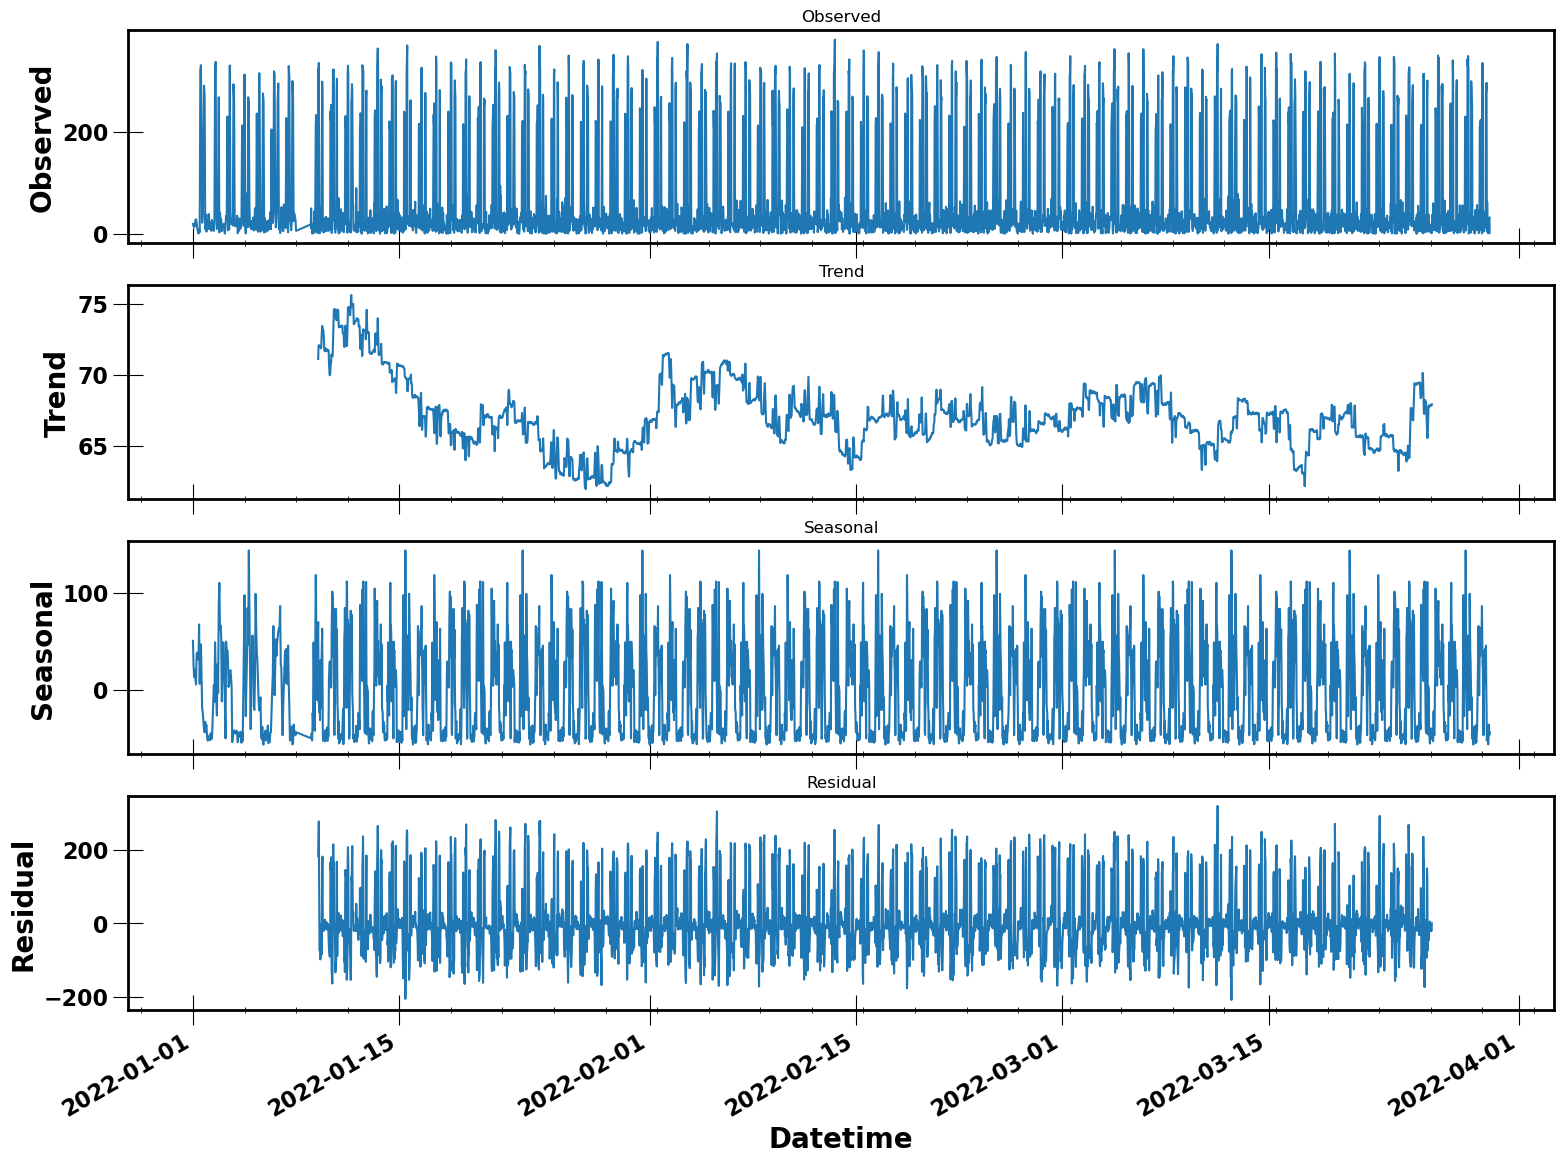

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_decom=df_features['energy']

result = seasonal_decompose(df_decom, model='additive', period=365)  # period=24 for hourly seasonality

# Create a figure with subplots and share x-axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12), facecolor='w', edgecolor='k', sharex=True)

# Plot observed data
result.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
ax1.set_title('Observed')

# Plot trend component
result.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')
ax2.set_title('Trend')

# Plot seasonal component
result.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal')

# Plot residual component
result.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')
ax4.set_title('Residual')

# Adjust layout to remove space between plots
plt.tight_layout(pad=2.0, h_pad=0.5, w_pad=0.5)
plt.show()

In [20]:
df_pred=df_features[['energy']]
df_pred

,energy
Datetime,
2022-01-01 00:00:00,19.443080
2022-01-01 01:00:00,14.478664
2022-01-01 02:00:00,12.761905
2022-01-01 03:00:00,14.595409
2022-01-01 04:00:00,26.931920
...,...
2022-03-29 22:00:00,2.379316
2022-03-29 22:30:00,12.245813
2022-03-29 23:00:00,20.545312


**Train-test split**

We do not use the train_test_split function from sklearn.model_selection, because train_test_split randomly shuffles the data by default. However, time series data is sequential, and we must preserve this order.

We will split 80/20

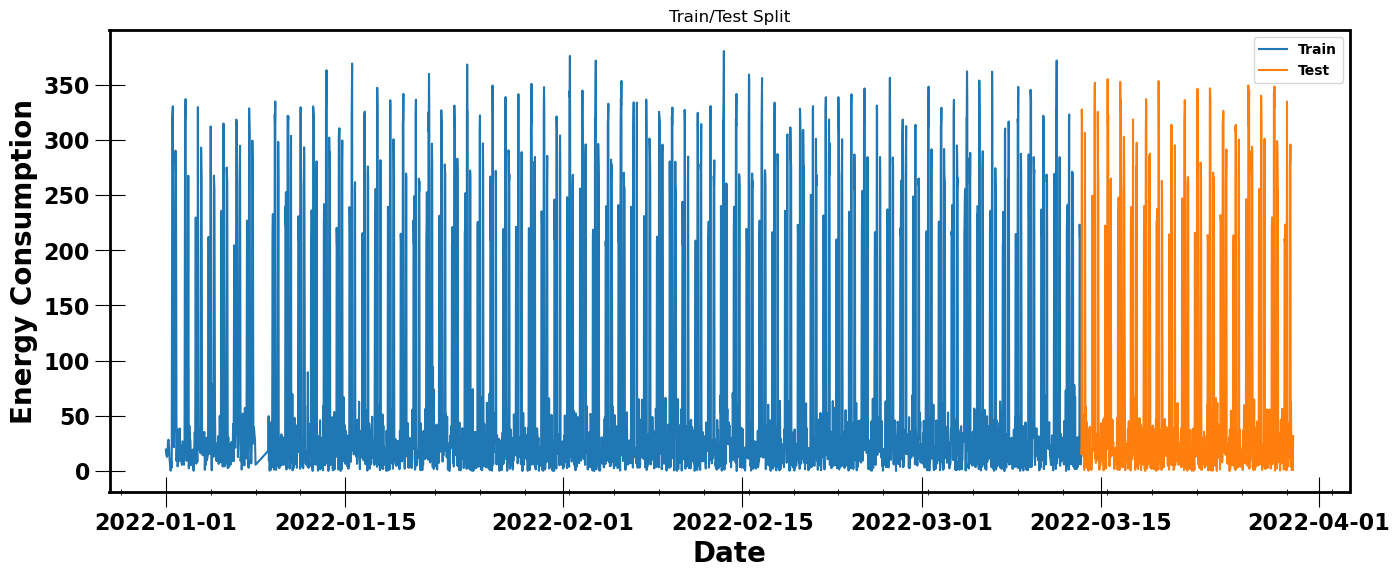

In [21]:
# Define a train-test split
train_size = int(len(df_pred) * 0.8)
train, test = df_pred.iloc[:train_size], df_pred.iloc[train_size:]
# Plot train and test data
plt.figure(figsize=(16, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [45]:
import statsmodels.tsa.holtwinters as ets

# Create and fit the Holt-Winters additive model
hw_add = ets.ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

# Forecast
forecast_hw = hw_add.forecast(steps=len(test))

# Evaluate the model
def eval_model(model, train_data, test_data, model_name):
    forecast = model.forecast(steps=len(test_data))
    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    rmse = root_mean_squared_error(test_data, forecast)
    r2=r2_score(test_data, forecast)
    #print(f'{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')
    return mae,mse,rmse,r2
# Evaluate the Holt-Winters additive model
mae,mse,rmse,r2=eval_model(hw_add, train, test, 'Holt-Winters Additive')
print('Holt-Winters Additive - MAE: %s, MSE: %s, RMSE: %s, R2: %s'%(mae,mse,rmse,r2))
#hw_add.summary()

/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Holt-Winters Additive - MAE: 70.36623926105095, MSE: 9706.84205017275, RMSE: 98.52330714187761, R2: 0.06267826900607687


/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/tdejaege/anaconda3/envs/lemaitre/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

In [46]:
df_result.loc[0] = ['Holt-Winters Additive', mae,mse,rmse,r2]
df_result

,name,mae,mse,rmse,r2
0,Holt-Winters Additive,70.366239,9706.84205,98.523307,0.062678


In [47]:
 # Set forecast index to match the test dataset index
forecast_hw.index = test.index

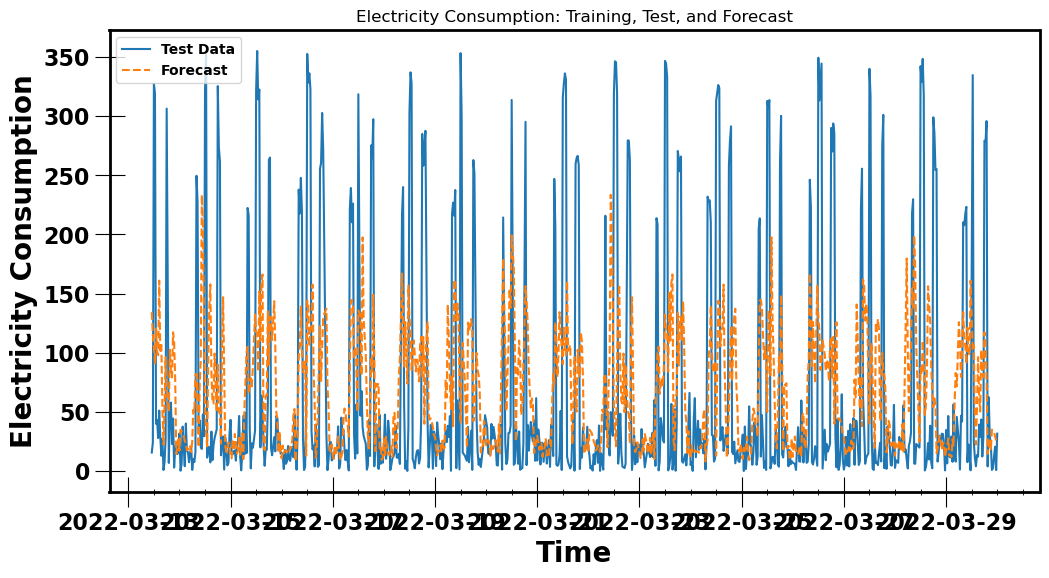

In [48]:
# Plotting train, test, and forecast
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_hw, label='Forecast', linestyle='--')
plt.legend(loc='best')
plt.title('Electricity Consumption: Training, Test, and Forecast')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.show()

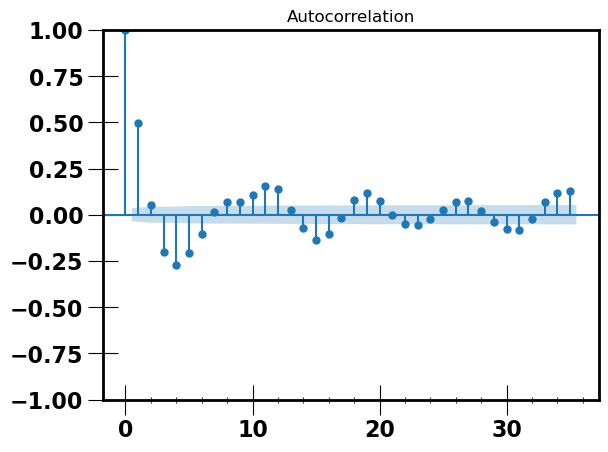

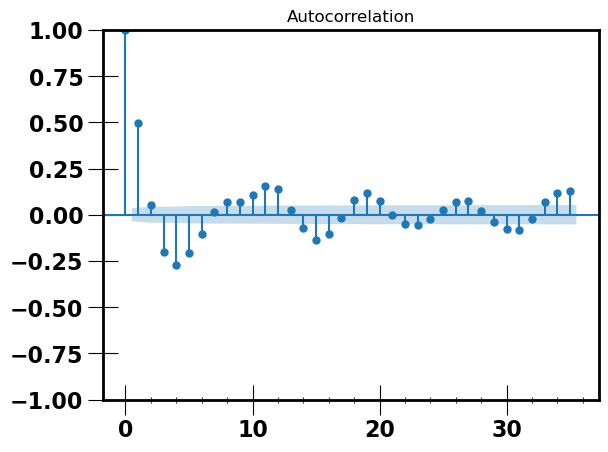

In [49]:
#Let's look at the residuals

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(hw_add.resid)

We need to use another model as we clearly see a trend in our residual.

### SARIMA Model

As we have seasonal data (3 peaks every day) we use SARIMA instead of ARIMA. SARIMA explicitly models seasonality, making it more appropriate for data with periodic patterns.

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
import itertools
from pmdarima import auto_arima
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

<Figure size 1200x600 with 0 Axes>

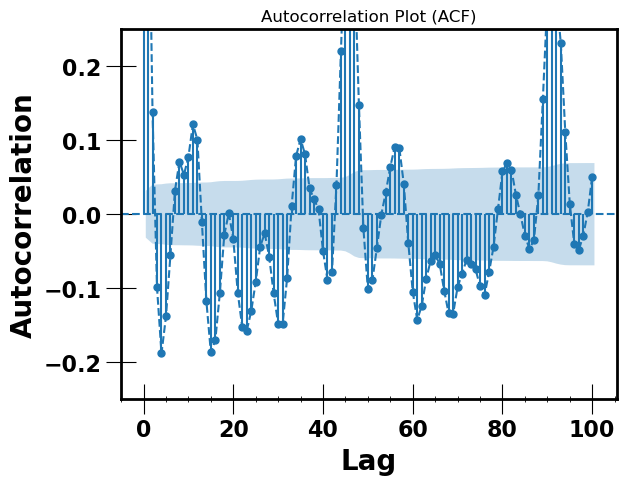

<Figure size 1200x600 with 0 Axes>

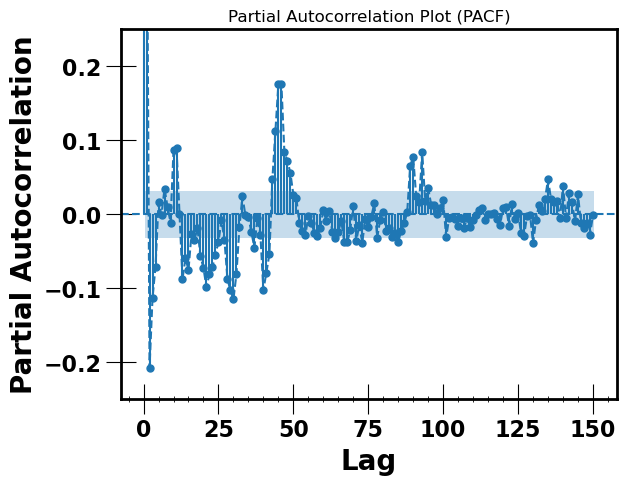

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df_pred, lags=100,linestyle='--')  
plt.ylim([-0.25,0.25])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot (ACF)')
plt.show

from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_pred, lags=150,method='ywm',linestyle='--')  
plt.ylim([-0.25,0.25])

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot (PACF)')
plt.show()

acf_vals = sm.tsa.pacf(df_pred, nlags=40)


In [24]:
# Use auto_arima to find the best parameters on the training data
# Fit auto_arima model with broader search range

#How to find m, we have peak every half hour/hourly
#https://robjhyndman.com/hyndsight/seasonal-periods/

#model = auto_arima(train, start_p=0, start_q=0,max_p=7, max_q=7, seasonal=True,m=48, trace=True)
#print(auto_model.summary())

In [45]:


order = (1, 1, 1)  # (p, d, q)
seasonal_order =  (1, 1, 1, 24)  # (P, D, Q, S)
sarimax_model = SARIMAX(train['energy'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

# Fit SARIMAX model
model_fit = sarimax_model.fit(disp=False)
print(model_fit.summary())

# Make predictions on the test set
forecast_steps = len(test)
forecast_sarima = model_fit.get_forecast(steps=forecast_steps)
forecast_index=test.index

# Extracting forecasts and confidence intervals
forecast_mean = forecast_sarima.predicted_mean
forecast_ci = forecast_sarima.conf_int()
forecast_series = pd.Series(forecast_mean.values, index=forecast_index)
print(forecast_series)







                                     SARIMAX Results                                      
Dep. Variable:                             energy   No. Observations:                 3048
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -17658.834
Date:                            Mon, 24 Jun 2024   AIC                          35327.668
Time:                                    15:34:10   BIC                          35357.695
Sample:                                         0   HQIC                         35338.470
                                           - 3048                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5305      0.016     33.516      0.000       0.500       0.562
ma.L1         -1.0000      3.220   

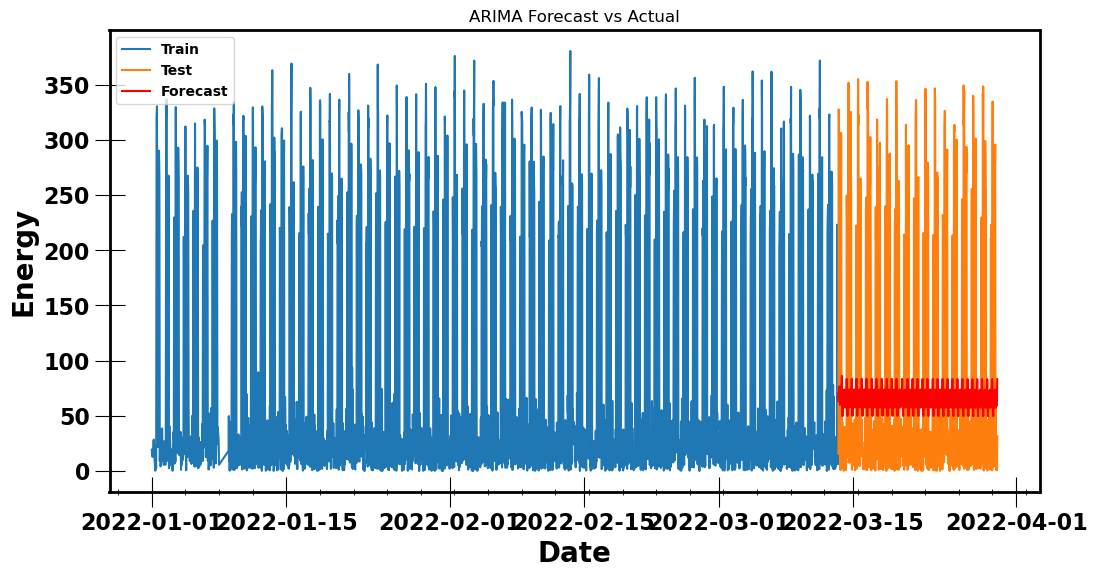

In [46]:
# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_series, label='Forecast', color='red')

plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [47]:

# Example evaluation (adjust as needed)
mae = mean_absolute_error(test['energy'], forecast_mean)
mse = mean_squared_error(test['energy'], forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 76.0964834165514
MSE: 10435.809679161659


Let try another model

# Forecast using Radom Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [49]:
# Split into features (X) and target variable (y)
X = df_features.drop(['energy','second','weekofyear','Month','weekday','season'], axis=1)
y = df_features['energy']
# Define a train-test split
train_size = int(len(df_features) * 0.8)
X_train,X_test,y_train,y_test=X[0:train_size],X[train_size:],y[0:train_size],y[train_size:]

print(X_train)

                     hour  min  month  year  dayofmonth  hourmin
Datetime                                                        
2022-01-01 00:00:00     0    0      1  2022           1      0.0
2022-01-01 01:00:00     1    0      1  2022           1      1.0
2022-01-01 02:00:00     2    0      1  2022           1      2.0
2022-01-01 03:00:00     3    0      1  2022           1      3.0
2022-01-01 04:00:00     4    0      1  2022           1      4.0
...                   ...  ...    ...   ...         ...      ...
2022-03-13 08:30:00     8   30      3  2022          13      8.5
2022-03-13 09:00:00     9    0      3  2022          13      9.0
2022-03-13 09:30:00     9   30      3  2022          13      9.5
2022-03-13 10:00:00    10    0      3  2022          13     10.0
2022-03-13 10:30:00    10   30      3  2022          13     10.5

[3048 rows x 6 columns]


In [50]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [51]:
# Predict on the test set
y_pred = rf.predict(X_test)
forecast_rf = pd.Series(y_pred, index=y_test.index)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2970.5637464930446
R-squared: 0.713153470665457


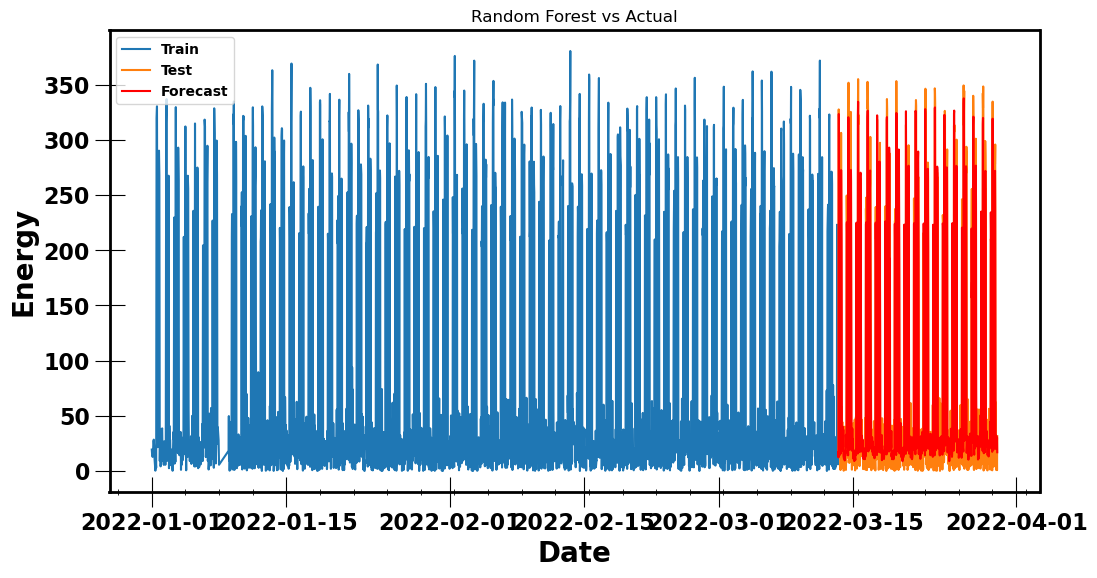

In [52]:
# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(forecast_rf, label='Forecast', color='red')

plt.title('Random Forest vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

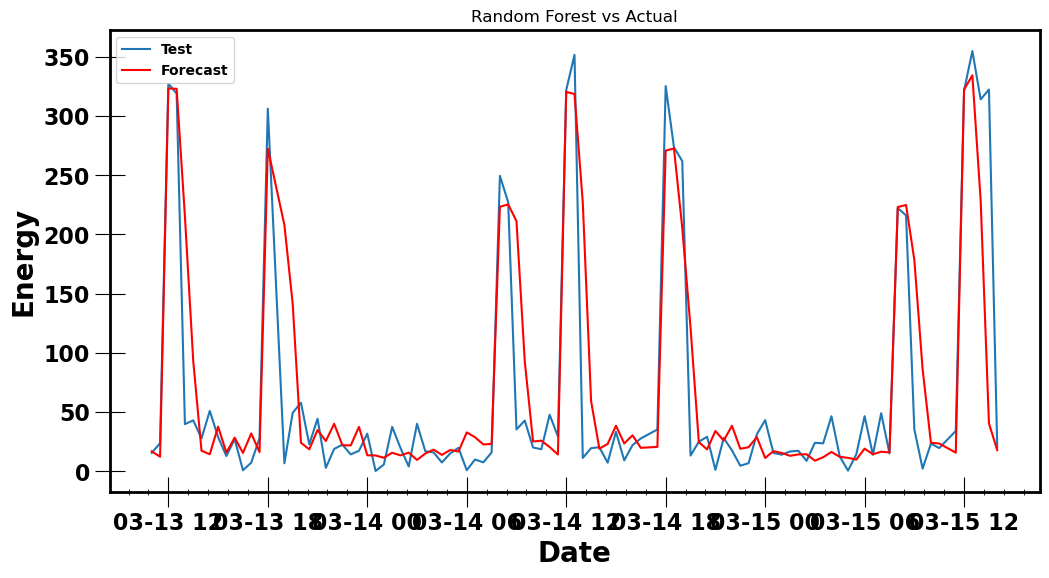

In [53]:
# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
plt.plot(y_test[0:100], label='Test')
plt.plot(forecast_rf[0:100], label='Forecast', color='red')

plt.title('Random Forest vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

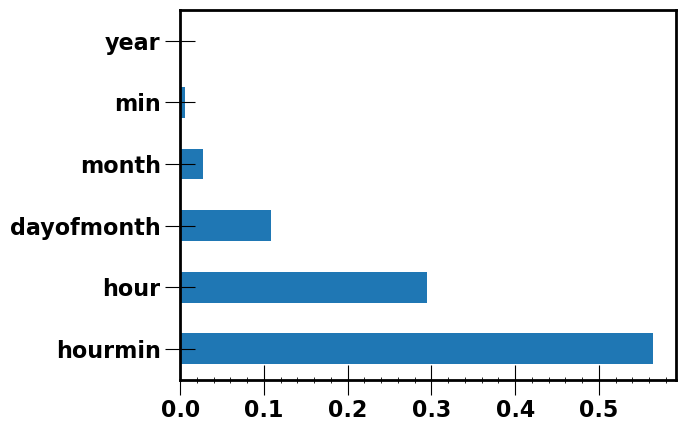

In [54]:
# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-scores.mean())
print(f'Cross-validated RMSE: {cv_rmse}')

Cross-validated RMSE: 50.74935670328327


In [61]:
from sklearn.model_selection import GridSearchCV

# Define parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

In [62]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [63]:
# Initialize final model with best parameters
final_rf = RandomForestRegressor(**best_params, random_state=42)
final_rf.fit(X, y)
y_pred = rf.predict(X_test)

def eval_model(test_data, forecast):
    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    rmse = root_mean_squared_error(test_data, forecast)
    r2=r2_score(test_data, forecast)
    #print(f'{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')
    return mae,mse,rmse,r2

mae,mse,rmse,r2=eval_model(y_test, y_pred)
df_result.loc[1] = ['Random Forest Regression', mae,mse,rmse,r2]
df_result

NameError: name 'df_result' is not defined

## Future prediction

If we are happy with these results, we can use the model in order to predict future values, which we haven't any information about. For that, it's convenient to train our model with all available data

In [ ]:
# Initialize final model with best parameters
final_rf = RandomForestRegressor(**best_params, random_state=42)

# Fit final model on all data
final_rf.fit(X, y)

# Make predictions on new data, let create April

new_data = pd.DataFrame(index=pd.date_range(start='2022-03-30', end='2022-06-01', freq='30T'))
# Create DataFrame with timestamps

#Add the features:
new_data['Datetime'] = new_data.index
new_data['hour'] = new_data['Datetime'].dt.hour
new_data['min'] = new_data['Datetime'].dt.minute
new_data['month'] = new_data['Datetime'].dt.month
new_data['year'] = new_data['Datetime'].dt.year
new_data['dayofmonth'] = new_data['Datetime'].dt.day
new_data['hourmin']=new_data['hour']+new_data['min']/60
new_data = new_data.set_index('Datetime')

new_data

# Make predictions on new data
predictions = final_rf.predict(new_data)

**Confidence Interval using bootstraap**

In [ ]:
num_samples = 100  
predictions = []
df_bootstrap=df_features.drop(['second','weekofyear','Month','weekday','season'], axis=1)
for i in range(num_samples):
    bootstrap_sample = df_bootstrap.sample(n=len(df_bootstrap), replace=True)
    # Initialize Random Forest model
    final_rf = RandomForestRegressor(**best_params, random_state=42)
    
    # Fit Random Forest model on the bootstrap sample
    final_rf.fit(bootstrap_sample.drop('energy', axis=1), bootstrap_sample['energy'])
    
    # Make predictions on the new data
    sample_predictions = final_rf.predict(new_data)
    predictions.append(sample_predictions)

predictions = np.array(predictions)
mean_predictions = np.mean(predictions, axis=0)
std_dev_predictions = np.std(predictions, axis=0)

In [ ]:
# Calculate prediction intervals (e.g., 95% confidence interval)
alpha = 0.95
lower_bound = np.percentile(predictions, 100 * ((1 - alpha) / 2), axis=0)
upper_bound = np.percentile(predictions, 100 * (alpha + (1 - alpha) / 2), axis=0)

# Add prediction intervals to the new_data DataFrame
new_data['mean_predictions'] = mean_predictions
new_data['lower_bound'] = lower_bound
new_data['upper_bound'] = upper_bound

# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(forecast_rf, label='Current pred', color='red')

plt.plot(new_data.mean_predictions,'k',label='Future Prediction')
plt.fill_between(new_data.index, new_data['lower_bound'], new_data['upper_bound'], color='k', alpha=0.1, label='conf. int.', edgecolor=None)


plt.title('Random Forest ')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()



In [ ]:
# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
#plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(forecast_rf, label='Current pred', color='red')

plt.plot(new_data.mean_predictions,'k',label='Future Prediction')
plt.fill_between(new_data.index, new_data['lower_bound'], new_data['upper_bound'], color='k', alpha=0.1, label='conf. int.', edgecolor=None)

plt.xlim(pd.Timestamp('2022-03-25'), pd.Timestamp('2022-04-15'))  # Set x-axis limits
plt.xlim(pd.Timestamp('2022-03-25'), pd.Timestamp('2022-05-15'))  # Set x-axis limits


plt.title('Random Forest ')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

# Forecast using KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


def create_supervised_data(data, window_size, target_column):
    X, y, dates = [], [], []
    
    # Exclude the target column from feature columns
    feature_columns = [col for col in data.columns if col != target_column]
    
    for i in range(len(data) - window_size):
        # Select only the feature columns for X
        X.append(data[feature_columns].iloc[i:i + window_size].values)
        
        # Select the target column for y
        y.append(data[target_column].iloc[i + window_size])
        
        dates.append(data.index[i + window_size])
    
    X = np.array(X)
    y = np.array(y)
    dates = np.array(dates)
    
    return X, y, dates


In [ ]:
df_pred=df_features.drop(['second','weekofyear','Month','weekday','season'], axis=1)
window_size = 24  # 24 hours look-back window (48 intervals of 30 minutes each)
X, y,date = create_supervised_data(df_pred, window_size,'energy')

# Splitting the data
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, date, test_size=0.3, shuffle=False)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X = X.reshape(X.shape[0], -1)
X.shape

In [ ]:
# Training the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions on the test set for evaluation
y_pred = knn.predict(X_test)

# Evaluating the model
mae,mse,rmse,r2=eval_model(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

In [ ]:
# Initialize final model with best parameters
final_knn = KNeighborsRegressor(**best_params)

# Fit final model on all data
final_knn.fit(X_train, y_train)

y_pred_knn = final_knn.predict(X_test)
def eval_model(test_data, forecast):
    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    rmse = root_mean_squared_error(test_data, forecast)
    r2=r2_score(test_data, forecast)
    #print(f'{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')
    return mae,mse,rmse,r2

mae,mse,rmse,r2=eval_model(y_test, y_pred_knn)
df_result.loc[2] = ['KNeighbors Regression', mae,mse,rmse,r2]
df_result

In [ ]:
# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
plt.plot(dates_train,y_train, label='Train')
plt.plot(dates_test,y_test, label='Test')
plt.plot(dates_test,y_pred_knn, label='Prediction', color='red')

plt.title('KNeighbors vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [60]:
# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
plt.plot(dates_test[0:100],y_test[0:100], label='Test')
plt.plot(dates_test[0:100],y_pred_knn[0:100], label='Prediction', color='red')

plt.title('KNeighbors vs Actual')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

NameError: name 'dates_test' is not defined

<Figure size 1200x600 with 0 Axes>

### Predictions using KN regressor

In [ ]:
# Fit final model on all data
final_knn.fit(X, y)

# Make predictions on new data, let create April

new_data = pd.DataFrame(index=pd.date_range(start='2022-03-30', end='2022-06-01', freq='30T'))
# Create DataFrame with timestamps

#Add the features:
new_data['Datetime'] = new_data.index
new_data['hour'] = new_data['Datetime'].dt.hour
new_data['min'] = new_data['Datetime'].dt.minute
new_data['month'] = new_data['Datetime'].dt.month
new_data['year'] = new_data['Datetime'].dt.year
new_data['dayofmonth'] = new_data['Datetime'].dt.day
new_data['hourmin']=new_data['hour']+new_data['min']/60
new_data = new_data.set_index('Datetime')

def create_supervised_data_pred(data, window_size):
    X, dates = [], []

    for i in range(len(data) - window_size):
        # Select only the feature columns for X
        X.append(data.iloc[i:i + window_size].values)
        
        dates.append(data.index[i + window_size])
    
    X = np.array(X)
    dates = np.array(dates)
    
    return X, dates


X_future, date_feature = create_supervised_data_pred(new_data, window_size)  # Use entire data for prediction

# Prepare input for future month prediction
X_future_input = X_future.reshape(X_future.shape[0], -1)     # Flatten to 2D array
# Predict for the future month
y_pred_future = final_knn.predict(X_future_input)


In [ ]:
num_samples = 100  
predictions = []
df_bootstrap=df_features.drop(['second','weekofyear','Month','weekday','season'], axis=1)
for i in range(num_samples):
    bootstrap_sample = df_bootstrap.sample(n=len(df_bootstrap), replace=True)

    X, y,date = create_supervised_data(bootstrap_sample, window_size,'energy')
    X = X.reshape(X.shape[0], -1)
    # Initialize final model with best parameters
    final_knn = KNeighborsRegressor(**best_params)

    # Fit K-NN model on the bootstrap sample
    final_knn.fit(X, y)
    
    # Make predictions on the new data
    sample_predictions = final_knn.predict(X_future_input)
    predictions.append(sample_predictions)

predictions = np.array(predictions)
mean_predictions = np.mean(predictions, axis=0)
std_dev_predictions = np.std(predictions, axis=0)

In [ ]:
df_result

In [59]:
# Calculate prediction intervals (e.g., 95% confidence interval)
alpha = 0.95
lower_bound = np.percentile(predictions, 100 * ((1 - alpha) / 2), axis=0)
upper_bound = np.percentile(predictions, 100 * (alpha + (1 - alpha) / 2), axis=0)

# Add prediction intervals to a new DataFrame
data = {
    'date': date_feature,
    'mean_predictions': mean_predictions,
    'lower_bound': lower_bound,
    'upper_bound': upper_bound
}

df_futur = pd.DataFrame(data)

# Plot the forecast against actual test data
plt.figure(figsize=(12, 6))
#plt.plot(y_train, label='Train')
plt.plot(dates_test,y_test, label='Test')
plt.plot(dates_test,y_pred_knn, label='Current Prediction', color='red')

plt.plot(df_futur.date,df_futur.mean_predictions,'k',label='Future Prediction')
plt.fill_between(df_futur.date, df_futur['lower_bound'], df_futur['upper_bound'], color='k', alpha=0.1, label='conf. int.', edgecolor=None)

plt.xlim(pd.Timestamp('2022-03-25'), pd.Timestamp('2022-04-15'))  # Set x-axis limits
plt.xlim(pd.Timestamp('2022-03-25'), pd.Timestamp('2022-05-15'))  # Set x-axis limits


plt.title('KN neighbors ')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

NameError: name 'predictions' is not defined

# Forecast using Recurrent Neural Networks

To investigate possible serial dependence (like cycles) in a time series, we need to create "lagged" copies of the series. Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps. In either case, the effect is that the observations in the lagged series will appear to have happened later in time.

In [29]:
df_pred=df_features.drop(['second','weekofyear','Month','weekday','season','year','min','hour','month','dayofmonth','hourmin'], axis=1)
df_pred

,energy
Datetime,
2022-01-01 00:00:00,19.443080
2022-01-01 01:00:00,14.478664
2022-01-01 02:00:00,12.761905
2022-01-01 03:00:00,14.595409
2022-01-01 04:00:00,26.931920
...,...
2022-03-29 22:00:00,2.379316
2022-03-29 22:30:00,12.245813
2022-03-29 23:00:00,20.545312


In [30]:


def create_lags(df, days=1):
    # create lagged data for features
    for i in range(days):
        df["Lag_{lag}".format(lag=i+1)] = df['energy'].shift(i+1)
    return df




In [31]:
df_lagged = df_pred.copy()
df_lagged = create_lags(df_lagged,24)
df_lagged.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(df_lagged.iloc[:int(len(df_pred)*0.80),1:])
y_train_scaled = scaler_Y.fit_transform(df_lagged.iloc[:int(len(df_pred)*0.80),0].values.reshape(-1,1))
X_test_scaled = scaler_X.transform(df_lagged.iloc[int(len(df_pred)*0.80):,1:])
y_test_scaled = scaler_Y.transform(df_lagged.iloc[int(len(df_pred)*0.80):,0].values.reshape(-1,1))


scaled_train = np.hstack((X_train_scaled, y_train_scaled))
scaled_train = pd.DataFrame(scaled_train, index=df_lagged.index[:int(len(df_pred)*0.80)], columns=df_lagged.columns)
print(scaled_train.shape)

scaled_test = np.hstack((X_test_scaled, y_test_scaled))
scaled_test = pd.DataFrame(scaled_test, index=df_lagged.index[int(len(df_pred)*0.80):], columns=df_lagged.columns)

scaled_train.head()


(3048, 25)


,energy,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,...,Lag_15,Lag_16,Lag_17,Lag_18,Lag_19,Lag_20,Lag_21,Lag_22,Lag_23,Lag_24
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-02 03:00:00,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,0.762703,0.100118,...,0.000789,0.027570,0.057274,0.074683,0.070768,0.038341,0.033521,0.038034,0.051083,0.024521
2022-01-02 04:00:00,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,0.762703,...,0.022062,0.000789,0.027570,0.057274,0.074683,0.070768,0.038341,0.033521,0.038034,0.059137
2022-01-02 05:00:00,0.059137,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,...,0.007908,0.022062,0.000789,0.027570,0.057274,0.074683,0.070768,0.038341,0.033521,0.030858
2022-01-02 06:00:00,0.030858,0.059137,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,...,0.840303,0.007908,0.022062,0.000789,0.027570,0.057274,0.074683,0.070768,0.038341,0.014712
2022-01-02 07:00:00,0.014712,0.030858,0.059137,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,...,0.868385,0.840303,0.007908,0.022062,0.000789,0.027570,0.057274,0.074683,0.070768,0.070709


In [34]:
X_train = scaled_train.drop(["energy"],axis=1)
y_train = scaled_train["energy"]
X_test = scaled_test.drop(["energy"],axis=1)
y_test = scaled_test["energy"]


Datetime
2022-01-02 03:00:00    0.101478
2022-01-02 04:00:00    0.024521
2022-01-02 05:00:00    0.059137
2022-01-02 06:00:00    0.030858
2022-01-02 07:00:00    0.014712
                         ...   
2022-03-13 21:00:00    0.059824
2022-03-13 21:30:00    0.116700
2022-03-13 22:00:00    0.007611
2022-03-13 22:30:00    0.049692
2022-03-13 23:00:00    0.059114
Name: energy, Length: 3048, dtype: float64

In [41]:
def create_features(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

x_train_np = create_features(X_train, 24, 25)
x_test_np = create_features(X_test, 24, 25)
#print(x_train_np.shape, x_val_np.shape, x_test_np.shape)
y_test = y_test[:x_test_np.shape[0]]
y_train = y_train[:x_train_np.shape[0]]


,Lag_1(t-24),Lag_2(t-24),Lag_3(t-24),Lag_4(t-24),Lag_5(t-24),Lag_6(t-24),Lag_7(t-24),Lag_8(t-24),Lag_9(t-24),Lag_10(t-24),...,Lag_15(t+25),Lag_16(t+25),Lag_17(t+25),Lag_18(t+25),Lag_19(t+25),Lag_20(t+25),Lag_21(t+25),Lag_22(t+25),Lag_23(t+25),Lag_24(t+25)
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:00:00,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,0.762703,0.100118,0.056707,...,0.050194,0.109407,0.866351,0.021808,0.076729,0.017487,0.603567,0.074433,0.092613,0.040558
2022-01-03 06:00:00,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,0.762703,0.100118,...,0.063790,0.050194,0.109407,0.866351,0.021808,0.076729,0.017487,0.603567,0.074433,0.557403
2022-01-03 07:00:00,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,0.762703,...,0.072999,0.063790,0.050194,0.109407,0.866351,0.021808,0.076729,0.017487,0.603567,0.087596
2022-01-03 08:00:00,0.059137,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,0.704236,...,0.042508,0.072999,0.063790,0.050194,0.109407,0.866351,0.021808,0.076729,0.017487,0.086629
2022-01-03 09:00:00,0.030858,0.059137,0.024521,0.101478,0.098238,0.023782,0.027412,0.011010,0.099044,0.023811,...,0.769954,0.042508,0.072999,0.063790,0.050194,0.109407,0.866351,0.021808,0.076729,0.040394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-13 08:00:00,0.712701,0.023227,0.016461,0.070159,0.171160,0.021321,0.015755,0.154370,0.037134,0.848890,...,0.838447,0.860907,0.062307,0.041020,0.104441,0.015860,0.053946,0.566449,0.557699,0.116700
2022-03-13 08:30:00,0.708597,0.712701,0.023227,0.016461,0.070159,0.171160,0.021321,0.015755,0.154370,0.037134,...,0.104747,0.838447,0.860907,0.062307,0.041020,0.104441,0.015860,0.053946,0.566449,0.007611
2022-03-13 09:00:00,0.683200,0.708597,0.712701,0.023227,0.016461,0.070159,0.171160,0.021321,0.015755,0.154370,...,0.113100,0.104747,0.838447,0.860907,0.062307,0.041020,0.104441,0.015860,0.053946,0.049692


In [39]:


def fit_model(m,units, x_train_np,y_train):
    model = Sequential()
    model.add(m (units = units, return_sequences = True, input_shape = [x_train_np.shape[1], x_train_np.shape[2]]))
    #model.add(Dropout(0.2))
    model.add(m (units = units))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    # Compile Model
    model.compile(loss='mse', optimizer='adam')
    # Fit Model
    history = model.fit(x_train_np, y_train, epochs=50, batch_size=70, verbose=False, shuffle=False)
    return model


In [40]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
RNN_model = fit_model(SimpleRNN, 64, x_train_np, y_train)
LSTM_model = fit_model(LSTM, 64, x_train_np, y_train)
GRU_model = fit_model(GRU, 64, x_train_np, y_train)

2024-06-24 15:20:01.982406: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 15:20:01.982871: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 15:20:01.985554: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 15:20:02.011237: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 15:20:02.571920: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

IndexError: tuple index out of range

In [ ]:
RNN_preds = RNN_model.predict(x_test_np)
LSTM_preds = LSTM_model.predict(x_test_np)
GRU_preds = GRU_model.predict(x_test_np)

In [ ]:
rnn_preds = scaler_Y.inverse_transform(RNN_preds)
y_test_actual = scaler_Y.inverse_transform(pd.DataFrame(y_test))

In [ ]:
y_test_actual

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(rnn_preds, "r-", label="Predicted")
plt.plot(y_test_actual, label="Actual")
plt.title('RNN')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Plotting the results
plt.figure(figsize=(15, 8))
plt.plot(dates_train, y_train[:,0],'b', label='Train', alpha=0.7)
plt.plot(dates_test, y_test[:,0],'orange', label='Test', alpha=0.7)
plt.plot(dates_test, predictions[:,0],'r-', label='Predicted', alpha=0.7)

plt.title('KNN ')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()


In [ ]:

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_test, y_test)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)